<a href="https://colab.research.google.com/github/alvaroiramirez/Harvard_DataMining_Business_Student/blob/master/Cases/Fall/I%20Ok%20Cupid/Case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" width="57" height="67" src="https://1asolutions.com/school/all_classes/hes_logo_4.png">&nbsp;&nbsp;&nbsp;
# CSCI E-96: Data Mining for Business
## Case I: OKCupid

## **Harvard University Extension School**

### Alvaro Ramirez

**Oct. 7, 2024**

---

# Exploratory Data Analysis (EDA)

## Environment Setup

Let's start by checking what R version we are running.

In [3]:
version

               _                           
platform       aarch64-apple-darwin20.0.0  
arch           aarch64                     
os             darwin20.0.0                
system         aarch64, darwin20.0.0       
status                                     
major          4                           
minor          3.3                         
year           2024                        
month          02                          
day            29                          
svn rev        86002                       
language       R                           
version.string R version 4.3.3 (2024-02-29)
nickname       Angel Food Cake             

Some packages are already pre-installed in my system and some are missing. Here, I install those missing packages.

In [32]:
install.packages("mapproj")
install.packages("radiant.data")
install.packages('esquisse')
install.packages("IRdisplay")
install.packages("gridExtra")

also installing the dependency ‘maps’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



This is time to load the libraries required by my code.

In [1]:
# libraries
library(dplyr)
library(ggplot2)
library(ggthemes)
library(leaflet)
library(leaflet.extras)
library(mapproj)
library(lubridate)
library(DataExplorer)
library(stringr)
library(tidyr)
library(knitr)
library(esquisse)
library(gridExtra)
library(IRdisplay)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: maps


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




Let's set the default directory to ease coding.

In [4]:
# Set working directory
setwd("/Users/alvaroramirez/Library/CloudStorage/OneDrive-Personal/estudio/Harvard/Classes/CSCI E-96/CSCI E-96/Cases/Fall/I Ok Cupid")

---

## Data Import

Since our environment is ready, let's start loading the data to understand it. In this step I create a dataframe for each of the CSV files we have for analysis.

In [5]:
# Load OK Cupid data into memory
profiles <- read.csv("profiles.csv", stringsAsFactors = FALSE)
latlon <- read.csv("LatLon.csv", stringsAsFactors = FALSE)

Let's see what columns are numerical and what columns are categorical. Also, let's show some basic statistics for numerical columns.

In [8]:
# Explore df_eda
str(profiles)

'data.frame':	59946 obs. of  22 variables:
 $ age        : int  22 35 38 23 29 29 32 31 24 37 ...
 $ body_type  : chr  "a little extra" "average" "thin" "thin" ...
 $ diet       : chr  "strictly anything" "mostly other" "anything" "vegetarian" ...
 $ drinks     : chr  "socially" "often" "socially" "socially" ...
 $ drugs      : chr  "never" "sometimes" NA NA ...
 $ education  : chr  "working on college/university" "working on space camp" "graduated from masters program" "working on college/university" ...
 $ ethnicity  : chr  "asian, white" "white" NA "white" ...
 $ height     : int  75 70 68 71 66 67 65 65 67 65 ...
 $ income     : int  NA 80000 NA 20000 NA NA NA NA NA NA ...
 $ job        : chr  "transportation" "hospitality / travel" NA "student" ...
 $ last_online: chr  "2012-06-28 20:30:00" "2012-06-29 21:41:00" "2012-06-27 09:10:00" "2012-06-28 14:22:00" ...
 $ location   : chr  "south san francisco, california" "oakland, california" "san francisco, california" "berkeley, califor

In [7]:
# LatLon.csv
summary(latlon)

   location              lat             lon        
 Length:199         Min.   :12.25   Min.   :-157.9  
 Class :character   1st Qu.:37.43   1st Qu.:-122.3  
 Mode  :character   Median :37.88   Median :-122.0  
                    Mean   :37.83   Mean   :-107.9  
                    3rd Qu.:38.51   3rd Qu.:-104.2  
                    Max.   :55.95   Max.   : 109.2  

In [6]:
# df_eda.csv
summary(df_eda)

      age          body_type             diet              drinks         
 Min.   : 18.00   Length:59946       Length:59946       Length:59946      
 1st Qu.: 26.00   Class :character   Class :character   Class :character  
 Median : 30.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 32.34                                                           
 3rd Qu.: 37.00                                                           
 Max.   :110.00                                                           
                                                                          
    drugs            education          ethnicity             height    
 Length:59946       Length:59946       Length:59946       Min.   : 1.0  
 Class :character   Class :character   Class :character   1st Qu.:66.0  
 Mode  :character   Mode  :character   Mode  :character   Median :68.0  
                                                          Mean   :68.3  
                                   

In [9]:
# Explore latlon
str(latlon)

'data.frame':	199 obs. of  3 variables:
 $ location: chr  "south san francisco, california" "oakland, california" "san francisco, california" "berkeley, california" ...
 $ lat     : num  37.7 37.8 37.8 37.9 37.9 ...
 $ lon     : num  -122 -122 -122 -122 -122 ...


These two datasets, `latlon` and `profiles`, have a one-to-many relationship. The field used to link both tables is 'location'. Let's merge both datasets into one to ease our analysis work. The new dataframe will be called `df_eda`.

In [51]:
# Perform a left join to combine both dataframes using the 'location' column
df_eda <- profiles %>%
  left_join(latlon, by = "location")

---

## Data Analysis

Now, we know each column's data type, some basic statistics for numerical columns and have both datasets integrated into one. Let's check the existence of data in each of these columns.

In [48]:
# Summarize the number of missing values in each column
missing_summary <- sapply(df_eda, function(x) sum(is.na(x)))
missing_percentage <- sapply(df_eda, function(x) mean(is.na(x)) * 100)
existing_values <- sapply(df_eda, function(x) sum(!is.na(x)))

# Create a summary table of missing and existing values
missing_data <- data.frame(
  Column = names(df_eda),
  MissingValues = missing_summary,
  MissingPercentage = missing_percentage,
  ExistingValues = existing_values
)

# Print the summary table
print(missing_data)

                       Column MissingValues MissingPercentage ExistingValues
age                       age             0       0.000000000          59946
body_type           body_type          5296       8.834617823          54650
diet                     diet         24395      40.694958796          35551
drinks                 drinks          2985       4.979481533          56961
drugs                   drugs         14080      23.487805692          45866
education           education          6628      11.056617623          53318
ethnicity           ethnicity          5680       9.475194342          54266
height                 height             3       0.005004504          59943
income                 income             0       0.000000000          59946
job                       job          8198      13.675641411          51748
last_online       last_online             0       0.000000000          59946
location             location             0       0.000000000          59946

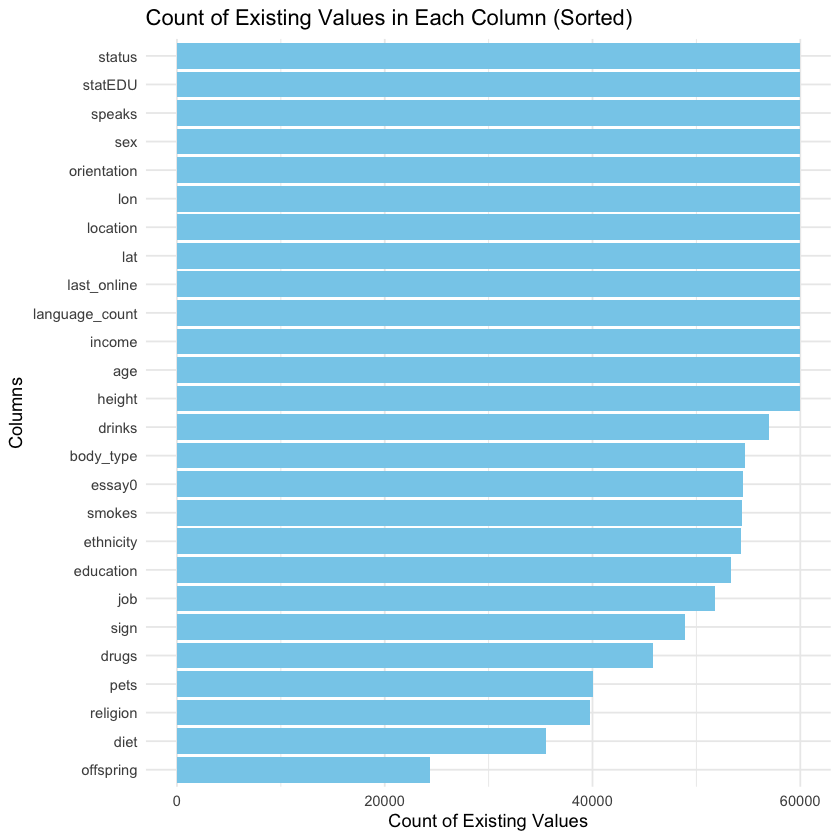

In [50]:
# Sort the data by ExistingValues
missing_data_sorted <- missing_data %>%
  arrange(desc(ExistingValues))

# Create the bar plot
ggplot(missing_data_sorted, aes(x = reorder(Column, ExistingValues), y = ExistingValues)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() + # Flip the coordinates for horizontal bars
  labs(title = "Count of Existing Values in Each Column (Sorted)",
       x = "Columns",
       y = "Count of Existing Values") +
  theme_minimal()

Although having all fields for all records is ideal, this is not our case. However, we still can manage to extract data to create the personas we want. Let's write a couple of functions to explore our categorical data in more detail. The first function, `create_df_with_counts`, reads a given column identifies unique values and them calculates the count and percentage of occurrencies of each value. The second function, `print_df_with_category_count`, prints the results of the previous function.

In [122]:
# Values used in categorical columns

# Function to calculate count and percentage for each unique value,
# handling NA values
create_df_with_counts <- function(column) {

  # Replace NA values with a placeholder ('<NA>')
  column_clean <- ifelse(is.na(column), "<NA>", column)

  # Get unique values including '<NA>' placeholder for NA
  unique_values <- unique(column_clean)

  # Create a dataframe with the unique values and their counts
  df <- data.frame(
    # UniqueValue = unique_values,
    Count = sapply(unique_values, function(x) sum(column_clean == x))
  )

  # Calculate the percentage for each value
  df$Percentage <- (df$Count / length(column)) * 100

  # Return both the dataframe and the number of unique categories
  return(list(df = df, num_categories = length(unique_values)))
}

In [216]:
print_df_with_category_count <- function(df_list, column_name, n = 20, m = 10) {
  cat("Column    : ", column_name, "\n", sep = "")
  cat("Categories: ", df_list$num_categories, "\n", sep = "")
  cat("\n")

  num_categories_df <- data.frame(
    category = rownames(df_list$df),
    num_categories = df_list$df$Count
  )

  # Sort by 'num_categories' in descending order
  num_categories_df <- num_categories_df[order(num_categories_df$num_categories, decreasing = TRUE), ]

  # Group categories if there are more than 'n'
  if (nrow(num_categories_df) > n) {
    # Get the top 'm' categories
    top_categories <- head(num_categories_df, m)

    # Calculate the sum of 'Others'
    other_count <- sum(num_categories_df$num_categories[(m + 1):nrow(num_categories_df)])

    # Create the 'Others' category
    other_category <- data.frame(category = "<All Others>", num_categories = other_count)

    # Combine top categories and 'Others' for both graph and table
    num_categories_df <- rbind(top_categories, other_category) 
    df_list$df <- rbind(df_list$df[1:m, ], colSums(df_list$df[(m+1):nrow(df_list$df), ]))
    rownames(df_list$df)[m+1] <- "<All Others>"
  }

  # Create the bar graph
  p <- ggplot(num_categories_df, aes(x = category, y = num_categories)) +
    geom_bar(stat = "identity") +
    theme_minimal() +
    labs(
      title = paste("Number of Categories for", column_name),
      x = column_name,
      y = "Count"
    ) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  # Create the table using knitr::kable
  table_html <- knitr::kable(df_list$df, format = "html")

  # Display the table and graph side by side 
  display_html(paste0(
    '<div style="display: flex;">',
    '<div style="flex: 1; padding-right: 10px;">', table_html, '</div>',
    '<div style="flex: 1;">', capture.output(print(p)), '</div>',
    '</div>'
  ))
}

### body_type

Column    : body_type
Categories: 13



Count 
 Percentage 
 
 
 
 
 a little extra 
 2629 
 4.3856137 
 
 
 average 
 14652 
 24.4419978 
 
 
 thin 
 4711 
 7.8587395 
 
 
 athletic 
 11819 
 19.7160778 
 
 
 fit 
 12711 
 21.2040837 
 
 
 <NA> 
 5296 
 8.8346178 
 
 
 skinny 
 1777 
 2.9643346 
 
 
 curvy 
 3924 
 6.5458913 
 
 
 full figured 
 1009 
 1.6831815 
 
 
 jacked 
 421 
 0.7022987 
 
 
 rather not say 
 198 
 0.3302973 
 
 
 used up 
 355 
 0.5921996 
 
 
 overweight 
 444 
 0.7406666

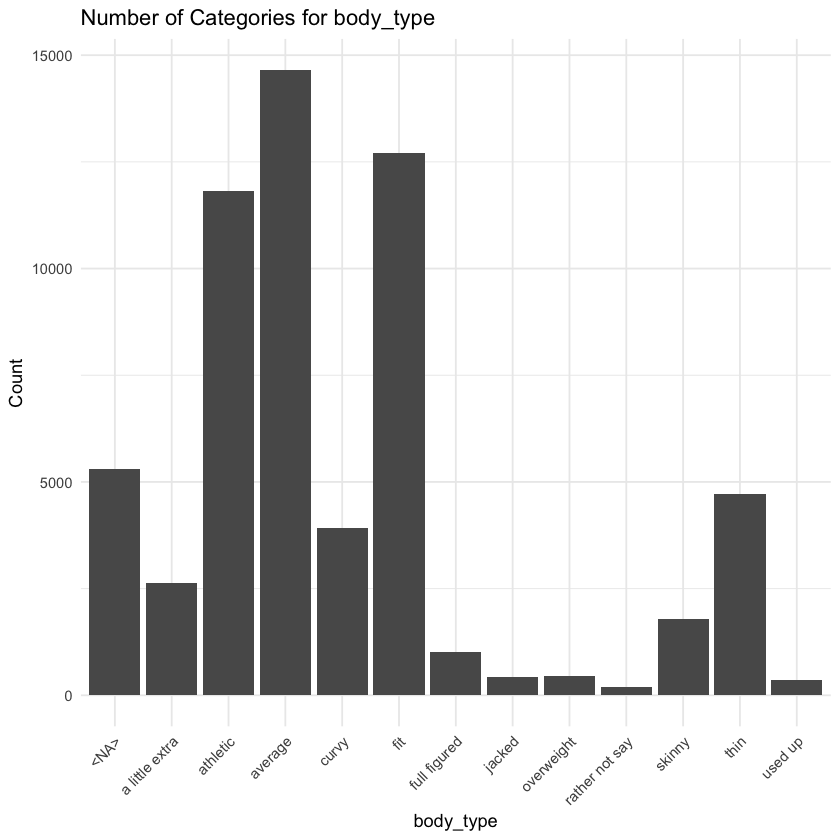

In [204]:
# 'body_type'
df_body_type <- create_df_with_counts(df_eda$body_type)
print_df_with_category_count(df_body_type, 'body_type')

### diet

Column    : diet
Categories: 19



Count 
 Percentage 
 
 
 
 
 strictly anything 
 5113 
 8.5293431 
 
 
 mostly other 
 1007 
 1.6798452 
 
 
 anything 
 6183 
 10.3142829 
 
 
 vegetarian 
 667 
 1.1126681 
 
 
 <NA> 
 24395 
 40.6949588 
 
 
 mostly anything 
 16585 
 27.6665666 
 
 
 mostly vegetarian 
 3444 
 5.7451707 
 
 
 strictly vegan 
 228 
 0.3803423 
 
 
 strictly vegetarian 
 875 
 1.4596470 
 
 
 mostly vegan 
 338 
 0.5638408 
 
 
 strictly other 
 452 
 0.7540119 
 
 
 mostly halal 
 48 
 0.0800721 
 
 
 other 
 331 
 0.5521636 
 
 
 vegan 
 136 
 0.2268709 
 
 
 mostly kosher 
 86 
 0.1434624 
 
 
 strictly halal 
 18 
 0.0300270 
 
 
 halal 
 11 
 0.0183498 
 
 
 strictly kosher 
 18 
 0.0300270 
 
 
 kosher 
 11 
 0.0183498

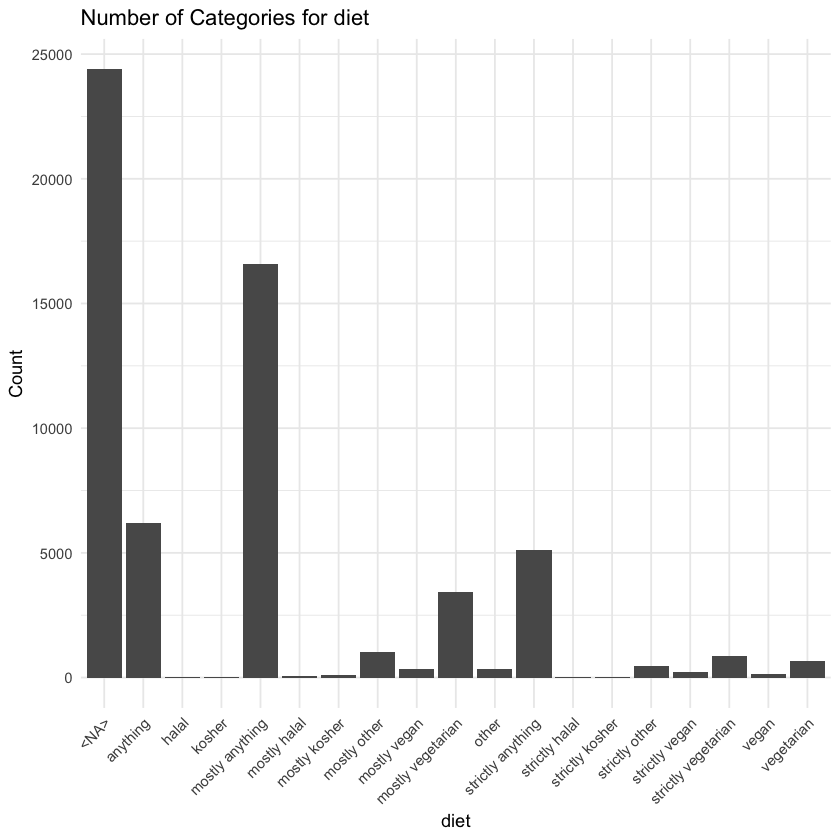

In [193]:
# 'diet'
df_diet <- create_df_with_counts(df_eda$diet)
print_df_with_category_count(df_diet, 'diet')

### drinks

Column    : drinks
Categories: 7



Count 
 Percentage 
 
 
 
 
 socially 
 41780 
 69.6960598 
 
 
 often 
 5164 
 8.6144196 
 
 
 not at all 
 3267 
 5.4499049 
 
 
 rarely 
 5957 
 9.9372769 
 
 
 <NA> 
 2985 
 4.9794815 
 
 
 very often 
 471 
 0.7857071 
 
 
 desperately 
 322 
 0.5371501

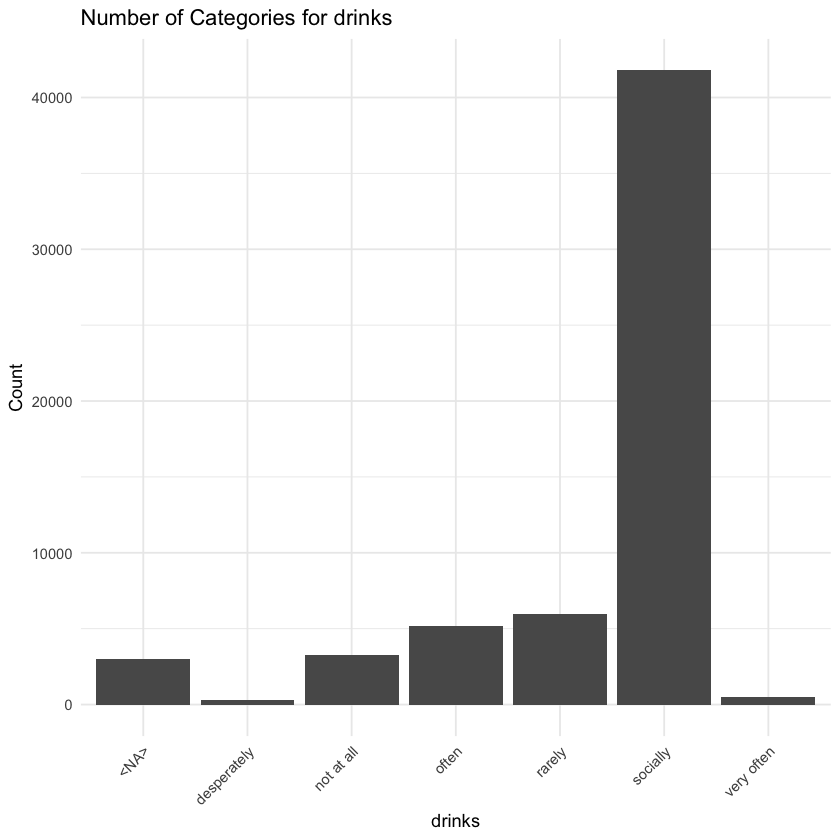

In [194]:
# 'drinks'
df_drinks <- create_df_with_counts(df_eda$drinks)
print_df_with_category_count(df_drinks, 'drinks')

### drugs

Column    : drugs
Categories: 4



Count 
 Percentage 
 
 
 
 
 never 
 37724 
 62.9299703 
 
 
 sometimes 
 7732 
 12.8982751 
 
 
 <NA> 
 14080 
 23.4878057 
 
 
 often 
 410 
 0.6839489

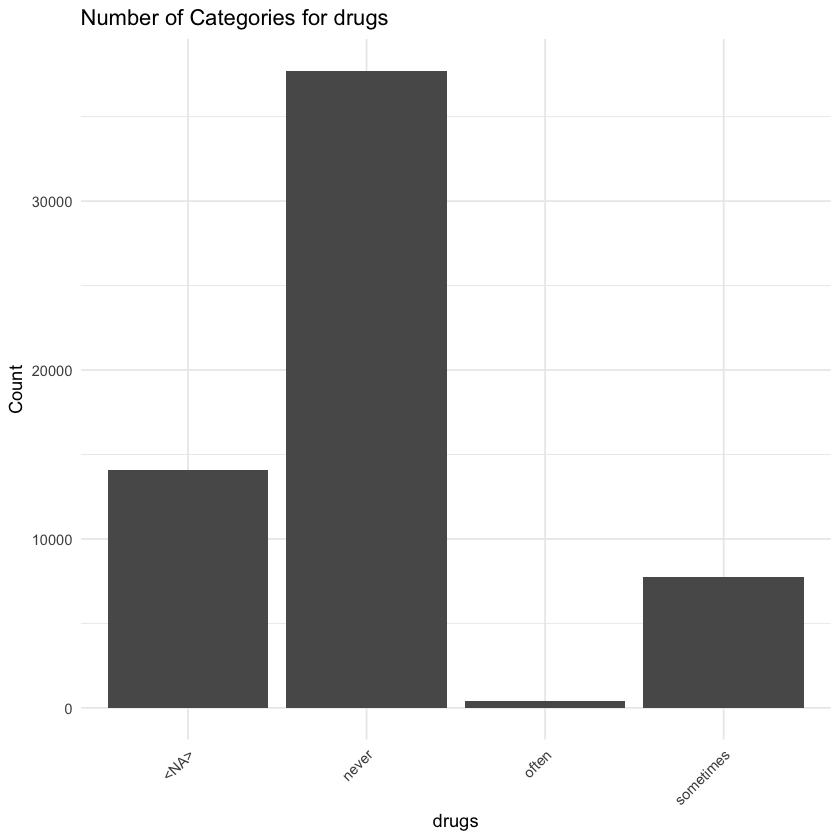

In [195]:
# 'drugs'
df_drugs <- create_df_with_counts(df_eda$drugs)
print_df_with_category_count(df_drugs, 'drugs')

### education

Column    : education
Categories: 33



Count 
 Percentage 
 
 
 
 
 working on college/university 
 5712 
 9.5285757 
 
 
 working on space camp 
 445 
 0.7423348 
 
 
 graduated from masters program 
 8961 
 14.9484536 
 
 
 graduated from college/university 
 23959 
 39.9676375 
 
 
 working on two-year college 
 1074 
 1.7916125 
 
 
 <NA> 
 6628 
 11.0566176 
 
 
 graduated from high school 
 1428 
 2.3821439 
 
 
 working on masters program 
 1683 
 2.8075268 
 
 
 graduated from space camp 
 657 
 1.0959864 
 
 
 college/university 
 801 
 1.3362026 
 
 
 dropped out of space camp 
 523 
 0.8724519 
 
 
 graduated from ph.d program 
 1272 
 2.1219097 
 
 
 graduated from law school 
 1122 
 1.8716845 
 
 
 working on ph.d program 
 983 
 1.6398092 
 
 
 two-year college 
 222 
 0.3703333 
 
 
 <All Others> 
 4476 
 7.4667200

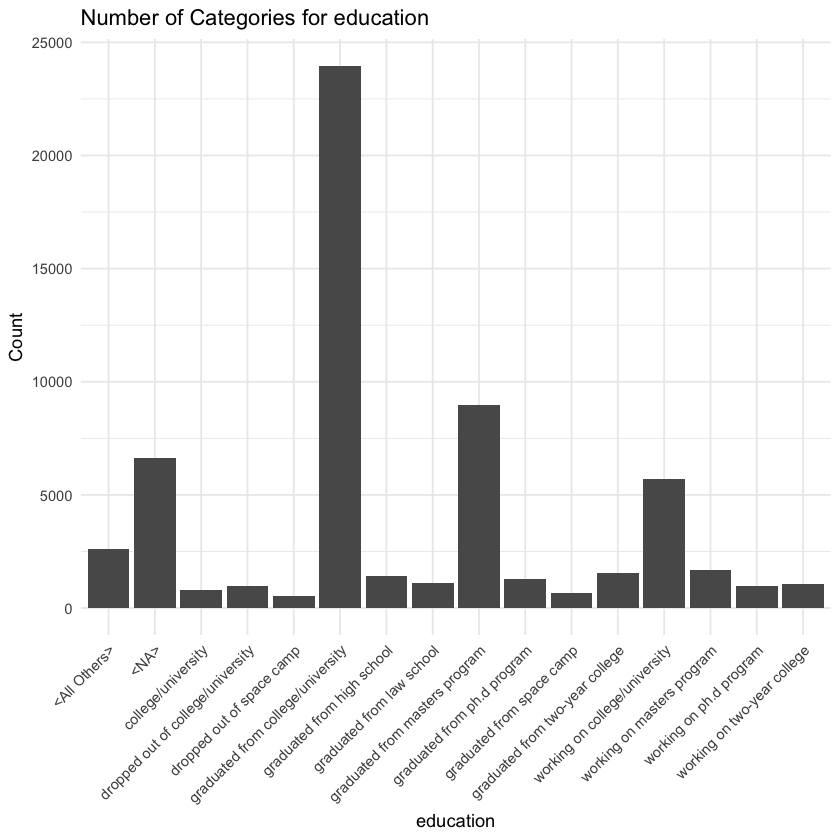

In [217]:
# 'education'
df_education <- create_df_with_counts(df_eda$education)
print_df_with_category_count(df_education, 'education', n = 20, m = 15)

### ethnicity

Column    : ethnicity
Categories: 218



Count 
 Percentage 
 
 
 
 
 asian, white 
 811 
 1.3528843 
 
 
 white 
 32831 
 54.7676242 
 
 
 <NA> 
 5680 
 9.4751943 
 
 
 asian, black, other 
 9 
 0.0150135 
 
 
 white, other 
 641 
 1.0692957 
 
 
 hispanic / latin, white 
 1301 
 2.1702866 
 
 
 hispanic / latin 
 2823 
 4.7092383 
 
 
 pacific islander, white 
 156 
 0.2602342 
 
 
 asian 
 6134 
 10.2325426 
 
 
 black, white 
 298 
 0.4971141 
 
 
 <All Others> 
 9262 
 15.4505722

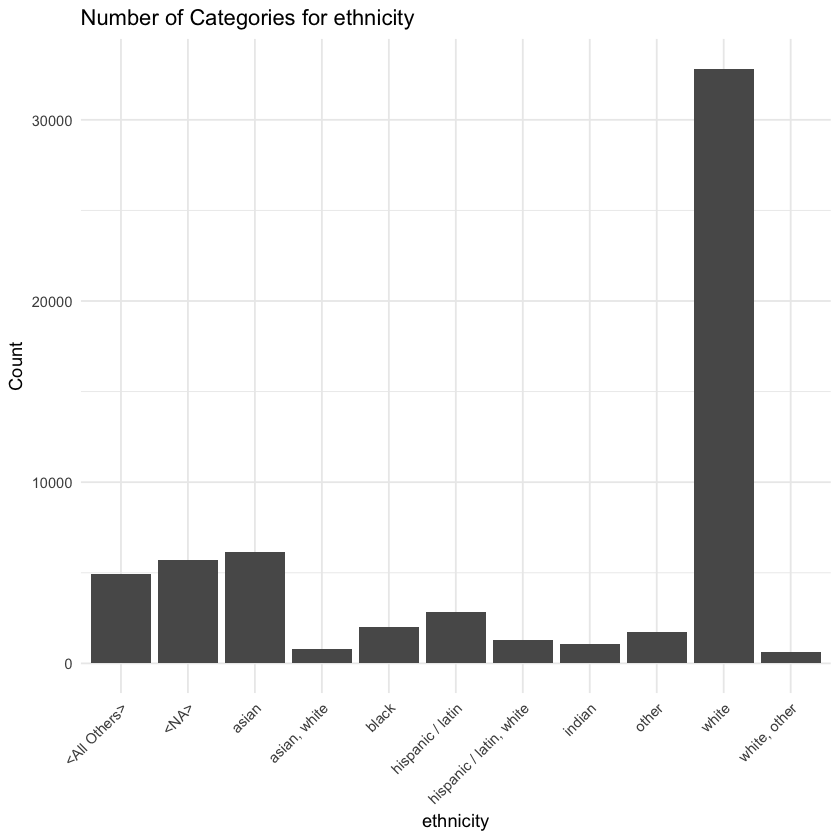

In [218]:
# 'ethnicity'
df_ethnicity <- create_df_with_counts(df_eda$ethnicity)
print_df_with_category_count(df_ethnicity, 'ethnicity')

### job

Column    : job
Categories: 22



Count 
 Percentage 
 
 
 
 
 transportation 
 366 
 0.6105495 
 
 
 hospitality / travel 
 1364 
 2.2753812 
 
 
 <NA> 
 8198 
 13.6756414 
 
 
 student 
 4882 
 8.1439963 
 
 
 artistic / musical / writer 
 4439 
 7.4049978 
 
 
 computer / hardware / software 
 4709 
 7.8554032 
 
 
 banking / financial / real estate 
 2266 
 3.7800687 
 
 
 entertainment / media 
 2250 
 3.7533780 
 
 
 sales / marketing / biz dev 
 4391 
 7.3249258 
 
 
 other 
 7589 
 12.6597271 
 
 
 medicine / health 
 3680 
 6.1388583 
 
 
 science / tech / engineering 
 4848 
 8.0872786 
 
 
 executive / management 
 2373 
 3.9585627 
 
 
 education / academia 
 3513 
 5.8602742 
 
 
 clerical / administrative 
 805 
 1.3428753 
 
 
 construction / craftsmanship 
 1021 
 1.7031995 
 
 
 rather not say 
 436 
 0.7273213 
 
 
 political / government 
 708 
 1.1810630 
 
 
 law / legal services 
 1381 
 2.3037400 
 
 
 unemployed 
 273 
 0.4554099 
 
 
 military 
 204 
 0.3403063 
 
 
 retired 
 250 
 0.4170420

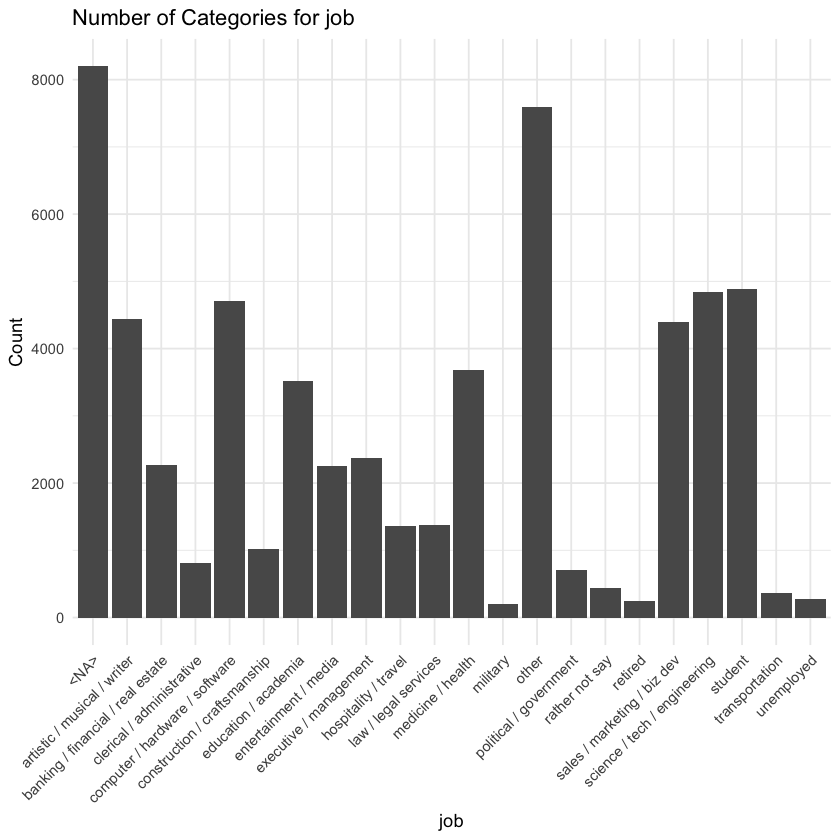

In [219]:
# 'job'
df_job <- create_df_with_counts(df_eda$job)
print_df_with_category_count(df_job, 'job', n = 25)

### location

Column    : location
Categories: 199



Count 
 Percentage 
 
 
 
 
 south san francisco, california 
 416 
 0.6939579 
 
 
 oakland, california 
 7214 
 12.0341641 
 
 
 san francisco, california 
 31064 
 51.8199713 
 
 
 berkeley, california 
 4212 
 7.0263237 
 
 
 belvedere tiburon, california 
 57 
 0.0950856 
 
 
 san mateo, california 
 1331 
 2.2203316 
 
 
 daly city, california 
 681 
 1.1360224 
 
 
 san leandro, california 
 651 
 1.0859774 
 
 
 atherton, california 
 45 
 0.0750676 
 
 
 san rafael, california 
 755 
 1.2594669 
 
 
 <All Others> 
 13520 
 22.5536316

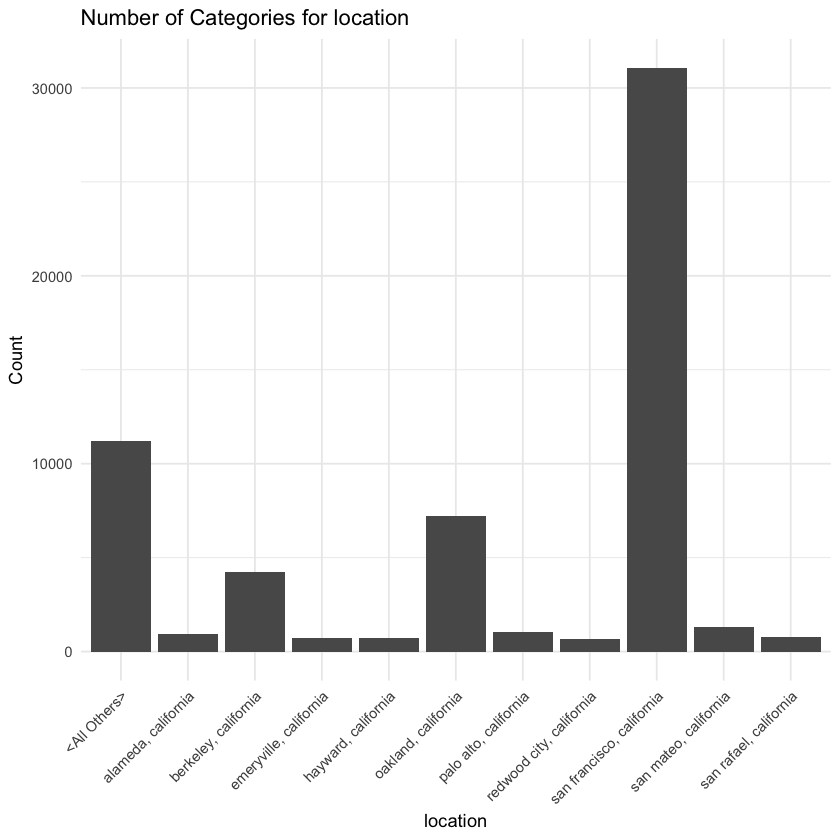

In [220]:
# 'location'
df_location <- create_df_with_counts(df_eda$location)
print_df_with_category_count(df_location, 'location')

### offspring

Column    : offspring
Categories: 16



Count 
 Percentage 
 
 
 
 
 doesn't have kids, but might want them 
 3875 
 6.4641511 
 
 
 <NA> 
 35561 
 59.3217229 
 
 
 doesn't want kids 
 2927 
 4.8827278 
 
 
 doesn't have kids, but wants them 
 3565 
 5.9470190 
 
 
 doesn't have kids 
 7560 
 12.6113502 
 
 
 wants kids 
 225 
 0.3753378 
 
 
 has a kid 
 1881 
 3.1378240 
 
 
 has kids 
 1883 
 3.1411604 
 
 
 doesn't have kids, and doesn't want any 
 1132 
 1.8883662 
 
 
 has kids, but doesn't want more 
 442 
 0.7373303 
 
 
 has a kid, but doesn't want more 
 275 
 0.4587462 
 
 
 has a kid, and wants more 
 71 
 0.1184399 
 
 
 has kids, and might want more 
 115 
 0.1918393 
 
 
 might want kids 
 182 
 0.3036066 
 
 
 has a kid, and might want more 
 231 
 0.3853468 
 
 
 has kids, and wants more 
 21 
 0.0350315

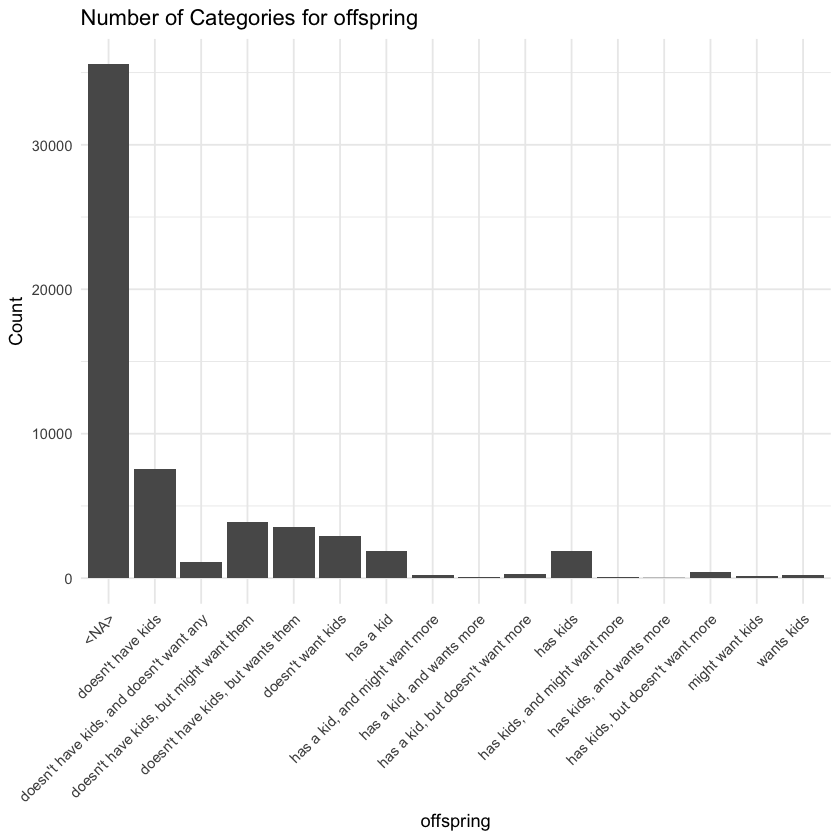

In [221]:
# 'offspring'
df_offspring <- create_df_with_counts(df_eda$offspring)
print_df_with_category_count(df_offspring, 'offspring')

### orientation

Column    : orientation
Categories: 3



Count 
 Percentage 
 
 
 
 
 straight 
 51606 
 86.087479 
 
 
 bisexual 
 2767 
 4.615821 
 
 
 gay 
 5573 
 9.296700

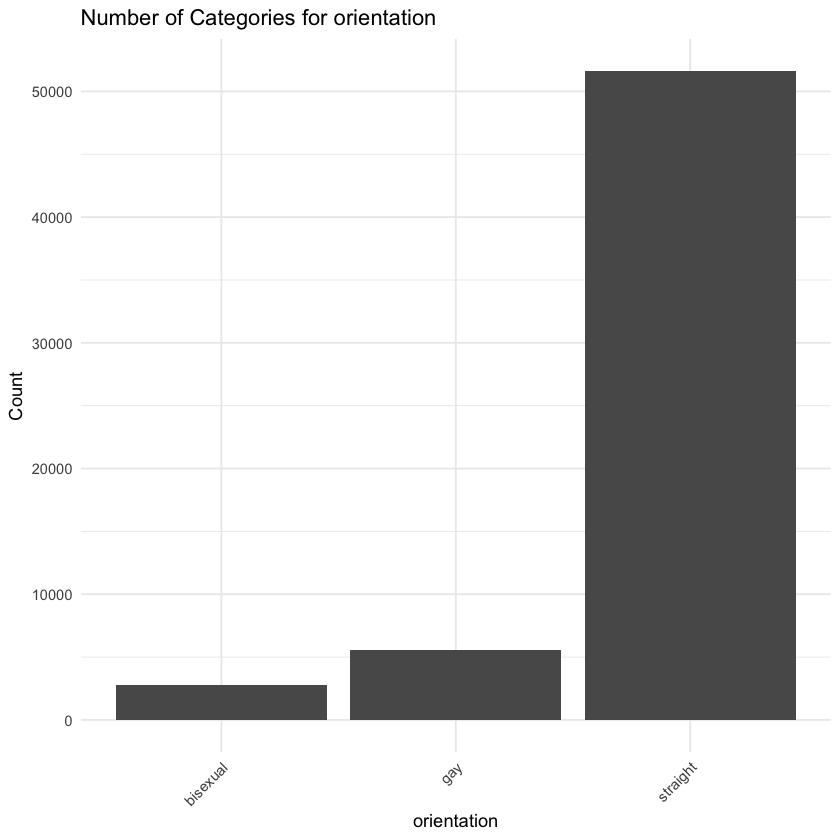

In [159]:
# 'orientation'
df_orientation <- create_df_with_counts(df_eda$orientation)
print_df_with_category_count(df_orientation, 'orientation')

### pets

Column    : pets
Categories: 16



Count 
 Percentage 
 
 
 
 
 likes dogs and likes cats 
 14814 
 24.7122410 
 
 
 has cats 
 1406 
 2.3454442 
 
 
 likes cats 
 1063 
 1.7732626 
 
 
 <NA> 
 19921 
 33.2315751 
 
 
 has dogs and likes cats 
 2333 
 3.8918360 
 
 
 likes dogs and has cats 
 4313 
 7.1948087 
 
 
 likes dogs and dislikes cats 
 2029 
 3.3847129 
 
 
 has dogs 
 4134 
 6.8962066 
 
 
 has dogs and dislikes cats 
 552 
 0.9208287 
 
 
 likes dogs 
 7224 
 12.0508458 
 
 
 has dogs and has cats 
 1474 
 2.4588797 
 
 
 dislikes dogs and has cats 
 81 
 0.1351216 
 
 
 dislikes dogs and dislikes cats 
 196 
 0.3269609 
 
 
 dislikes cats 
 122 
 0.2035165 
 
 
 dislikes dogs and likes cats 
 240 
 0.4003603 
 
 
 dislikes dogs 
 44 
 0.0733994

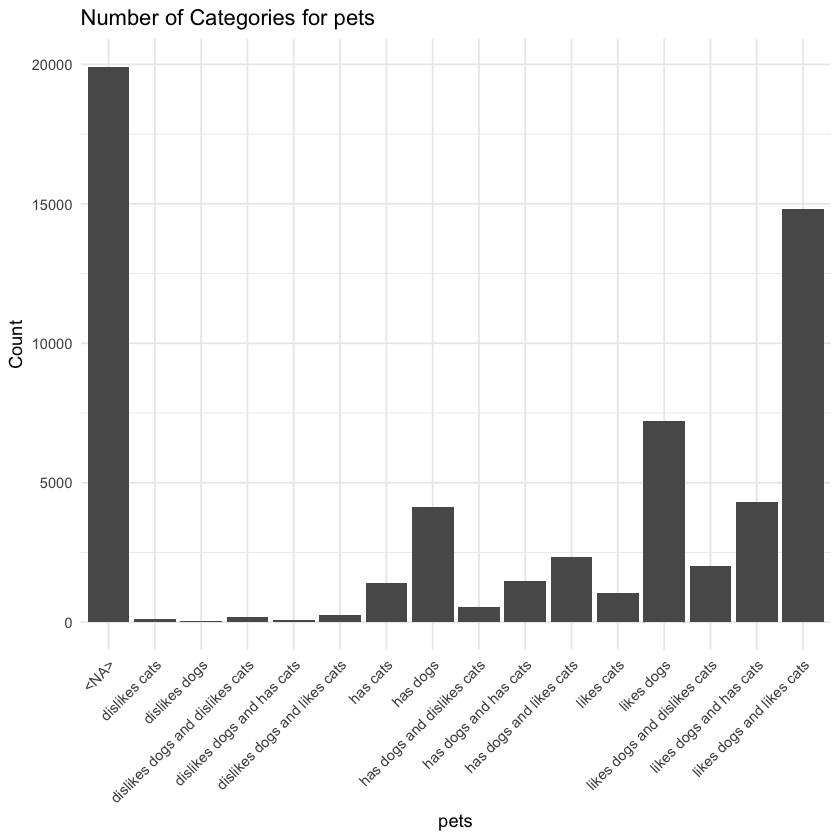

In [160]:
# 'pets'
df_pets <- create_df_with_counts(df_eda$pets)
print_df_with_category_count(df_pets, 'pets')

### religion

Column    : religion
Categories: 46



Count 
 Percentage 
 
 
 
 
 agnosticism and very serious about it 
 314 
 0.5238048 
 
 
 agnosticism but not too serious about it 
 2636 
 4.3972909 
 
 
 <NA> 
 20226 
 33.7403663 
 
 
 atheism 
 2175 
 3.6282654 
 
 
 christianity 
 1957 
 3.2646048 
 
 
 christianity but not too serious about it 
 1952 
 3.2562640 
 
 
 atheism and laughing about it 
 2074 
 3.4597805 
 
 
 christianity and very serious about it 
 578 
 0.9642011 
 
 
 other 
 2691 
 4.4890401 
 
 
 catholicism 
 1064 
 1.7749308 
 
 
 catholicism but not too serious about it 
 2318 
 3.8668135 
 
 
 catholicism and somewhat serious about it 
 548 
 0.9141561 
 
 
 agnosticism and somewhat serious about it 
 642 
 1.0709639 
 
 
 catholicism and laughing about it 
 726 
 1.2110900 
 
 
 agnosticism and laughing about it 
 2496 
 4.1637474 
 
 
 agnosticism 
 2724 
 4.5440897 
 
 
 atheism and somewhat serious about it 
 848 
 1.4146065 
 
 
 buddhism but not too serious about it 
 650 
 1.0843092 
 
 
 other but not too serious about it 
 1554 
 2.5923331 
 
 
 buddhism 
 403 
 0.6722717 
 
 
 <All Others> 
 11370 
 18.9670704

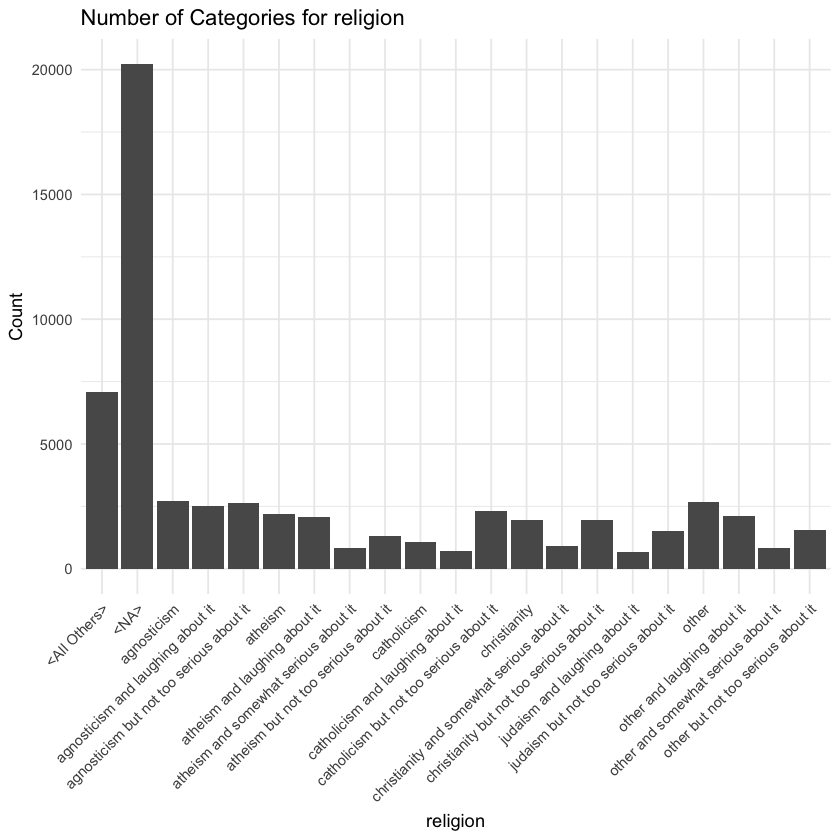

In [229]:
# 'religion'
df_religion <- create_df_with_counts(df_eda$religion)
print_df_with_category_count(df_religion, 'religion', n = 20, m = 20)

### sex

Column    : sex
Categories: 2



Count 
 Percentage 
 
 
 
 
 m 
 35829 
 59.76879 
 
 
 f 
 24117 
 40.23121

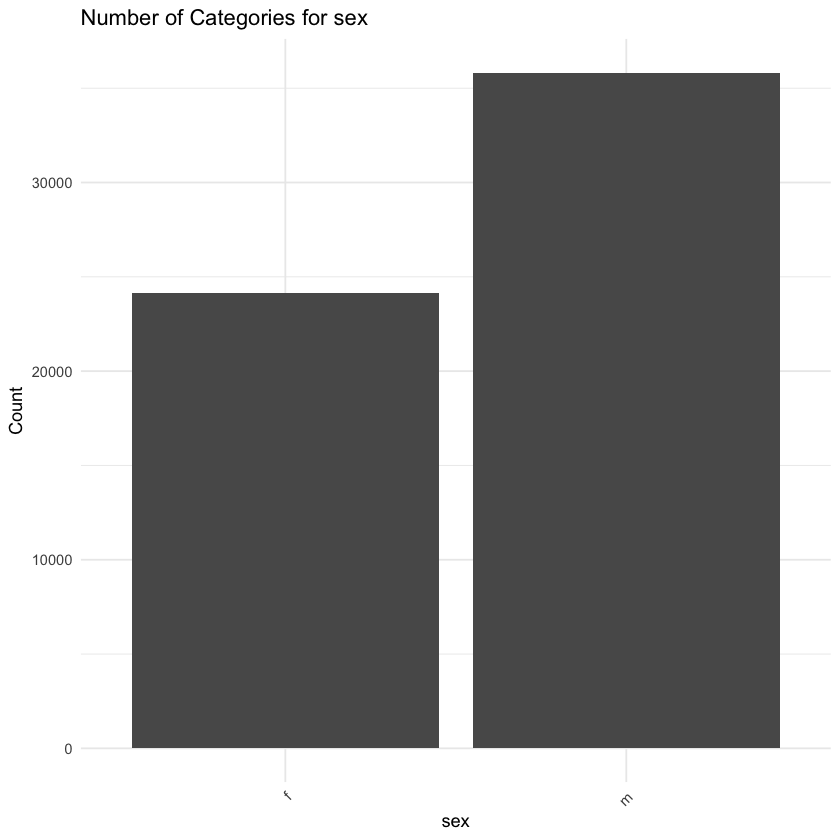

In [162]:
# 'sex'
df_sex <- create_df_with_counts(df_eda$sex)
print_df_with_category_count(df_sex, 'sex')

### sign

Column    : sign
Categories: 49



Count 
 Percentage 
 
 
 
 
 gemini 
 1013 
 1.6898542 
 
 
 cancer 
 1092 
 1.8216395 
 
 
 pisces but it doesn't matter 
 1300 
 2.1686184 
 
 
 pisces 
 992 
 1.6548227 
 
 
 aquarius 
 954 
 1.5914323 
 
 
 taurus 
 1001 
 1.6698362 
 
 
 virgo 
 1029 
 1.7165449 
 
 
 sagittarius 
 937 
 1.5630734 
 
 
 gemini but it doesn't matter 
 1453 
 2.4238481 
 
 
 cancer but it doesn't matter 
 1454 
 2.4255163 
 
 
 leo but it doesn't matter 
 1457 
 2.4305208 
 
 
 <NA> 
 11056 
 18.4432656 
 
 
 aquarius but it doesn't matter 
 1408 
 2.3487806 
 
 
 aries and it's fun to think about 
 1573 
 2.6240283 
 
 
 libra but it doesn't matter 
 1408 
 2.3487806 
 
 
 pisces and it's fun to think about 
 1592 
 2.6557235 
 
 
 libra 
 1098 
 1.8316485 
 
 
 taurus but it doesn't matter 
 1450 
 2.4188436 
 
 
 sagittarius but it doesn't matter 
 1375 
 2.2937310 
 
 
 scorpio and it matters a lot 
 78 
 0.1301171 
 
 
 gemini and it's fun to think about 
 1782 
 2.9726754 
 
 
 leo and it's fun to think about 
 1692 
 2.8225403 
 
 
 cancer and it's fun to think about 
 1597 
 2.6640643 
 
 
 libra and it's fun to think about 
 1649 
 2.7508091 
 
 
 aquarius and it's fun to think about 
 1503 
 2.5072565 
 
 
 virgo but it doesn't matter 
 1497 
 2.4972475 
 
 
 scorpio and it's fun to think about 
 1772 
 2.9559937 
 
 
 capricorn but it doesn't matter 
 1319 
 2.2003136 
 
 
 scorpio 
 1020 
 1.7015314 
 
 
 capricorn and it's fun to think about 
 1376 
 2.2953992 
 
 
 leo 
 1159 
 1.9334067 
 
 
 aries but it doesn't matter 
 1373 
 2.2903947 
 
 
 aries 
 996 
 1.6614953 
 
 
 scorpio but it doesn't matter 
 1264 
 2.1085644 
 
 
 sagittarius and it's fun to think about 
 1583 
 2.6407100 
 
 
 libra and it matters a lot 
 52 
 0.0867447 
 
 
 taurus and it's fun to think about 
 1640 
 2.7357955 
 
 
 leo and it matters a lot 
 66 
 0.1100991 
 
 
 virgo and it's fun to think about 
 1574 
 2.6256965 
 
 
 cancer and it matters a lot 
 63 
 0.1050946 
 
 
 capricorn 
 833 
 1.3895840 
 
 
 pisces and it matters a lot 
 62 
 0.1034264 
 
 
 aries and it matters a lot 
 47 
 0.0784039 
 
 
 capricorn and it matters a lot 
 45 
 0.0750676 
 
 
 aquarius and it matters a lot 
 63 
 0.1050946 
 
 
 sagittarius and it matters a lot 
 47 
 0.0784039 
 
 
 gemini and it matters a lot 
 62 
 0.1034264 
 
 
 taurus and it matters a lot 
 49 
 0.0817402 
 
 
 virgo and it matters a lot 
 41 
 0.0683949

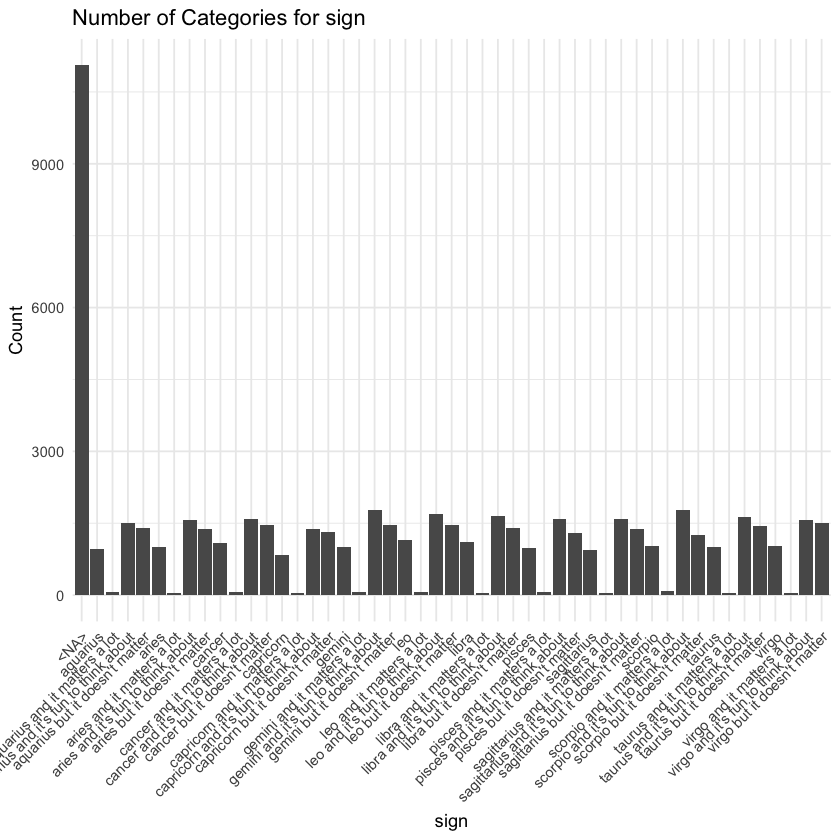

In [163]:
# 'sign'
df_sign <- create_df_with_counts(df_eda$sign)
print_df_with_category_count(df_sign, 'sign')

### smokes

Column    : smokes
Categories: 6



Count 
 Percentage 
 
 
 
 
 sometimes 
 3787 
 6.317352 
 
 
 no 
 43896 
 73.225903 
 
 
 <NA> 
 5512 
 9.194942 
 
 
 when drinking 
 3040 
 5.071231 
 
 
 yes 
 2231 
 3.721683 
 
 
 trying to quit 
 1480 
 2.468889

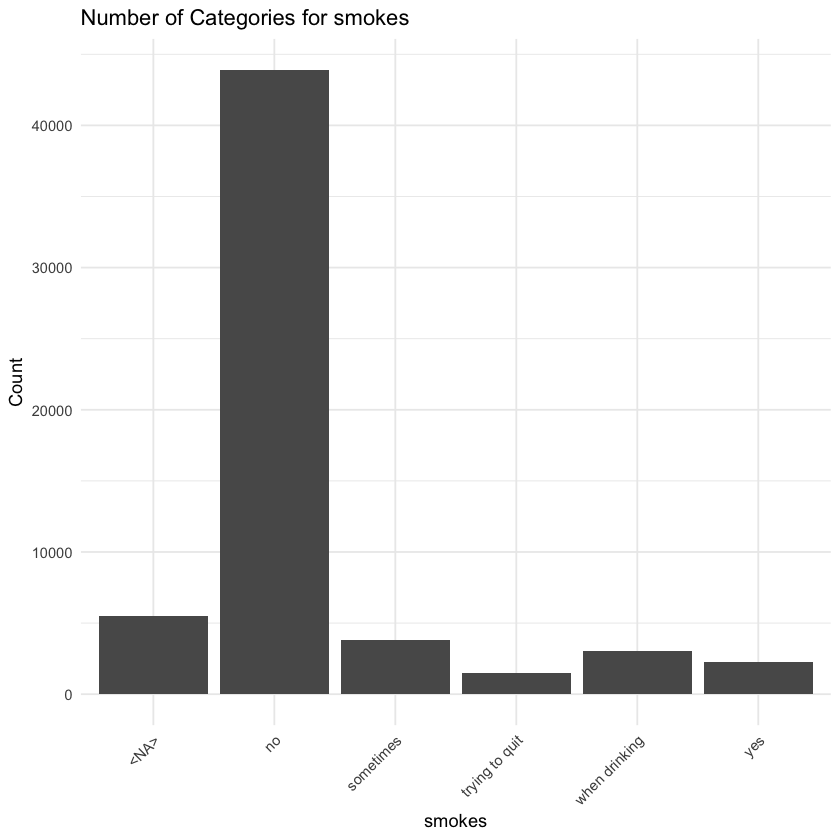

In [164]:
# 'smokes'
df_smokes <- create_df_with_counts(df_eda$smokes)
print_df_with_category_count(df_smokes, 'smokes')

### speaks

Column    : speaks
Categories: 7586



Count 
 Percentage 
 
 
 
 
 english 
 21963 
 36.6379742 
 
 
 english(fluently), spanish(poorly), french(poorly) 
 93 
 0.1551396 
 
 
 english, french, c++ 
 4 
 0.0066727 
 
 
 english, german(poorly) 
 82 
 0.1367898 
 
 
 english(fluently), chinese(okay) 
 430 
 0.7173122 
 
 
 english, spanish(okay) 
 655 
 1.0926501 
 
 
 english(fluently) 
 6649 
 11.0916492 
 
 
 english(fluently), signlanguage(poorly) 
 78 
 0.1301171 
 
 
 english(fluently), spanish(okay) 
 1919 
 3.2012144 
 
 
 english(fluently), c++(fluently), german(poorly), french(poorly) 
 1 
 0.0016682 
 
 
 <All Others> 
 28072 
 46.8288126

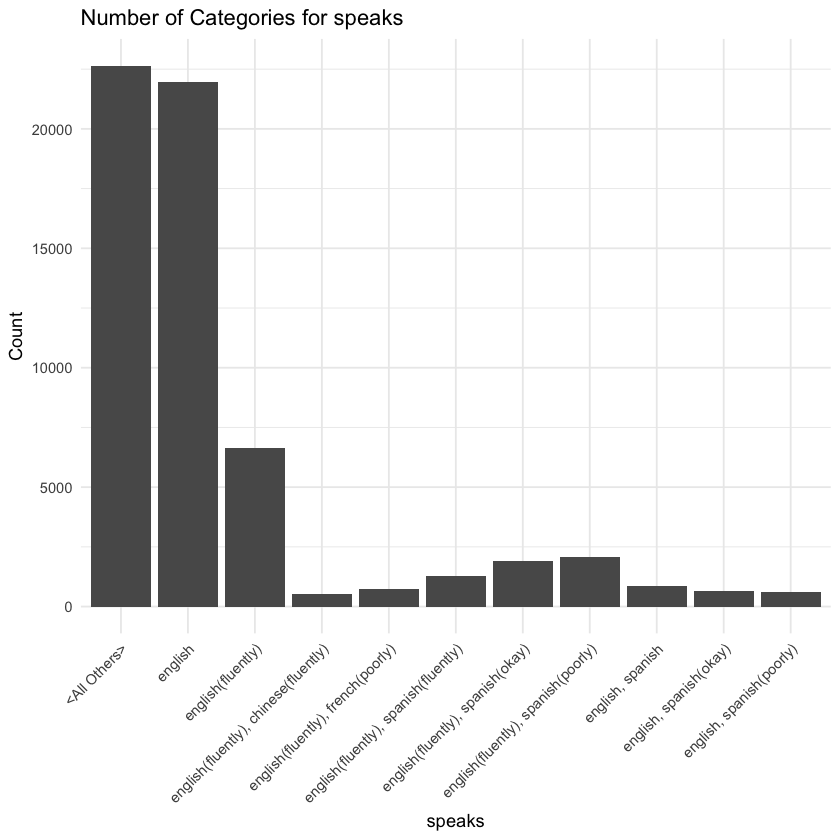

In [230]:
# 'speaks'
df_speaks <- create_df_with_counts(df_eda$speaks)
print_df_with_category_count(df_speaks, 'speaks')

In [178]:
# Save the 'df_speaks' dataframe as a CSV file
write.csv(df_speaks$df, file = "speaks.csv", row.names = FALSE)

In [236]:
# # Apply the function to the 'speaks' column
# df_eda$speaks <- sapply(df_eda$speaks, process_speaks)

# # Count how many languages each person speaks
# df_eda <- df_eda %>%
#   mutate(language_count = sapply(strsplit(speaks, ", "), length))

# # Count how many people speak each language
# language_counts <- df_eda %>%
#   separate_rows(speaks, sep = ", ") %>%
#   group_by(speaks) %>%
#   summarise(count = n()) %>%
#   arrange(desc(count))

# # Count how many people speak each language indicating their level
# language_level_counts <- df_eda %>%
#   separate_rows(speaks, sep = ", ") %>%
#   mutate(language = str_extract(speaks, "^[^()]+"),
#          level = str_extract(speaks, "\\(([^)]+)\\)")) %>%
#   group_by(language, level) %>%
#   summarise(count = n()) %>%
#   arrange(language, desc(count))

# # Print the results
# # print(df_eda)
# print(language_counts)
# print(language_level_counts)

# # Exporting results
# write.csv(language_counts, "language_counts.csv", row.names = FALSE)
# write.csv(language_level_counts, "language_level_counts.csv", row.names = FALSE)

In [241]:
# # Apply the function to the 'speaks' column
# df_eda$speaks <- sapply(df_eda$speaks, process_speaks)

# # 1. Count how many languages each person speaks
# df_eda <- df_eda %>%
#   mutate(language_count = sapply(strsplit(speaks, ", "), length))

# # 4. Count how many people speak each language indicating their level
# language_level_counts <- df_eda %>%
#   separate_rows(speaks, sep = ", ") %>%
#   mutate(language = str_extract(speaks, "^[^()]+"),
#          level = str_extract(speaks, "\\(([^)]+)\\)")) %>%
#   group_by(language, level) %>%
#   summarise(count = n()) %>%
#   arrange(language, desc(count))

# # Print the totals for each language grouping all levels
# totals_per_language <- language_level_counts %>%
#   group_by(language) %>%
#   summarise(total_count = sum(count)) %>%
#   arrange(desc(total_count))

# print(totals_per_language)

# # Save the results in a CSV file
# write.csv(totals_per_language, "totals_per_language.csv", row.names = FALSE)

# ### ### Language analysis - End

In [242]:
# Define the order of fluency levels
fluency_levels <- c(NA, "(poorly)", "(okay)", "(fluently)")


# Function to process the 'speaks' column
process_speaks <- function(speaks) {

  # print(paste("0 - speaks: ", speaks, sep = "")) ### STEP 0

  if (is.na(speaks) || speaks == "") {
    # return("english")
    return("")
  }

  # print(paste("1 - speaks: ", speaks, sep = "")) ### STEP 1

  # Split the speaks column by comma
  languages <- unlist(strsplit(speaks, ","))

  # print(paste("2 - languages: ", languages, sep = "")) ### STEP 2

  # Remove leading and trailing whitespace and any extra spaces
  languages <- str_trim(languages)
  languages <- gsub("\\s+", "", languages)

  # print(paste("3 - languages: ", languages, sep = "")) ### STEP 3

  # Create a data frame of languages and levels
  languages_df <- data.frame(language = str_extract(languages, "^[^()]+"),
                             level = str_extract(languages, "\\(([^)]+)\\)"))

  # print(paste("4 - languages_df: ", languages_df, sep = "")) ### STEP 4
  # kable(languages_df, caption = 'STEP 4')

  # Ensure 'english' is included with no level if not already present
  if (!any(grepl("^english", tolower(languages_df$language)))) {
    languages_df <- rbind(languages_df, data.frame(language = "english", level = NA))
  }

  # print(paste("5 - languages_df: ", languages_df, sep = "")) ### STEP 5
  # kable(languages_df, caption = 'STEP 5')

  # Remove duplicates and keep the highest level, handle NA levels correctly
  cleaned_languages_df <- languages_df %>%
    mutate(level = factor(level, levels = fluency_levels, ordered = TRUE)) %>%
    group_by(language) %>%
    filter(if(all(is.na(level))) TRUE else level == max(level, na.rm = TRUE)) %>%
    distinct(language, .keep_all = TRUE) %>%  # Remove duplicates after filtering
    ungroup()  # Ungroup the dataframe

  # Print the cleaned dataframe
  # print(paste("6 - languages_df: ", cleaned_languages_df, sep = "")) ### STEP 6
  # kable(cleaned_languages_df, caption = 'STEP 6')

  # Combine languages and levels back into a single string
  languages <- paste(cleaned_languages_df$language, ifelse(is.na(cleaned_languages_df$level), "", paste0(cleaned_languages_df$level)), sep = "", collapse = ", ")

  # print(paste("7 - languages: ", languages, sep = "")) ### STEP 7

  return(languages)
}

In [273]:
### TEST ####
languages_df

ERROR: Error in eval(expr, envir, enclos): objeto 'languages_df' no encontrado


In [254]:
# Create a new dataset to avoid overwriting the original 'df_eda' dataset
df_eda_processed <- df_eda 
df_eda_processed$speaks <- sapply(df_eda_processed$speaks, process_speaks)

# 1. Count how many languages each person speaks
df_eda_processed <- df_eda_processed %>%
  mutate(language_count = sapply(strsplit(speaks, ", "), length))

# 4. Count how many people speak each language indicating their level
language_level_counts <- df_eda_processed %>%
  separate_rows(speaks, sep = ", ") %>%
  mutate(language = str_extract(speaks, "^[^()]+"),
         level = str_extract(speaks, "\\(([^)]+)\\)")) %>%
  group_by(language, level) %>%
  summarise(count = n_distinct(row_number())) %>%
  arrange(language, desc(count))

`summarise()` has grouped output by 'language'. You can override using the
`.groups` argument.


In [ ]:
# Calculate the totals for each language spoken
totals_per_language <- language_level_counts %>%
  group_by(language) %>%
  summarise(Count = sum(count)) %>%
  mutate(Percentage = Count / nrow(df_eda) * 100) %>% 
  arrange(desc(Count)) %>%
  select(language, Count, Percentage) %>%
  as.data.frame() # Convert to dataframe

# Print the results
totals_per_language

In [271]:
head(totals_per_language)

language Count Percentage
1 english  59946 100.000000
2 spanish  16312  27.211157
3 french    7851  13.096787
4 chinese   3660   6.105495
5 german    3083   5.142962
6 japanese  2188   3.649952

In [270]:
unique_values <- unique(totals_per_language$language)

# Create a dataframe with the unique values and their counts
df_languages <- data.frame(
# UniqueValue = unique_values,
Count = sapply(unique_values, function(x) sum(column_clean == x))
)

# Calculate the percentage for each value
#   df$Percentage <- (df$Count / length(column)) * 100

df_languages

ERROR: Error in FUN(X[[i]], ...): objeto 'column_clean' no encontrado


In [263]:
# Count columns in df_speaks
num_cols_df_speaks <- ncol(df_speaks)

# Count columns in totals_per_language
num_cols_totals_per_language <- ncol(totals_per_language)

# Print the results
cat("Number of columns in df_speaks:", num_cols_df_speaks, "\n")
cat("Number of columns in totals_per_language:", num_cols_totals_per_language, "\n")


Number of columns in df_speaks: 
Number of columns in totals_per_language: 3 


In [ ]:
# Create a new dataset to avoid overwriting the original 'df_eda' dataset
df_eda_processed <- df_eda 
df_eda_processed$speaks <- sapply(df_eda_processed$speaks, process_speaks)

# 1. Count how many languages each person speaks
df_eda_processed <- df_eda_processed %>%
  mutate(language_count = sapply(strsplit(speaks, ", "), length))

# 4. Count how many people speak each language indicating their level
language_level_counts <- df_eda_processed %>%
  separate_rows(speaks, sep = ", ") %>%
  mutate(language = str_extract(speaks, "^[^()]+"),
         level = str_extract(speaks, "\\(([^)]+)\\)")) %>%
  group_by(language, level) %>%
  summarise(count = n_distinct(row_number())) %>%
  arrange(language, desc(count))

`summarise()` has grouped output by 'language'. You can override using the
`.groups` argument.


In [265]:
# 'speaks'
df_speaks_totals <- create_df_with_counts(totals_per_language)
print_df_with_category_count(df_speaks_totals, 'speaks')

ERROR: Error in FUN(X[[i]], ...): 'list' object cannot be coerced to type 'integer'


### status

Column    : status
Categories: 5



Count 
 Percentage 
 
 
 
 
 single 
 55697 
 92.9119541 
 
 
 available 
 1865 
 3.1111334 
 
 
 seeing someone 
 2064 
 3.4430988 
 
 
 married 
 310 
 0.5171321 
 
 
 unknown 
 10 
 0.0166817

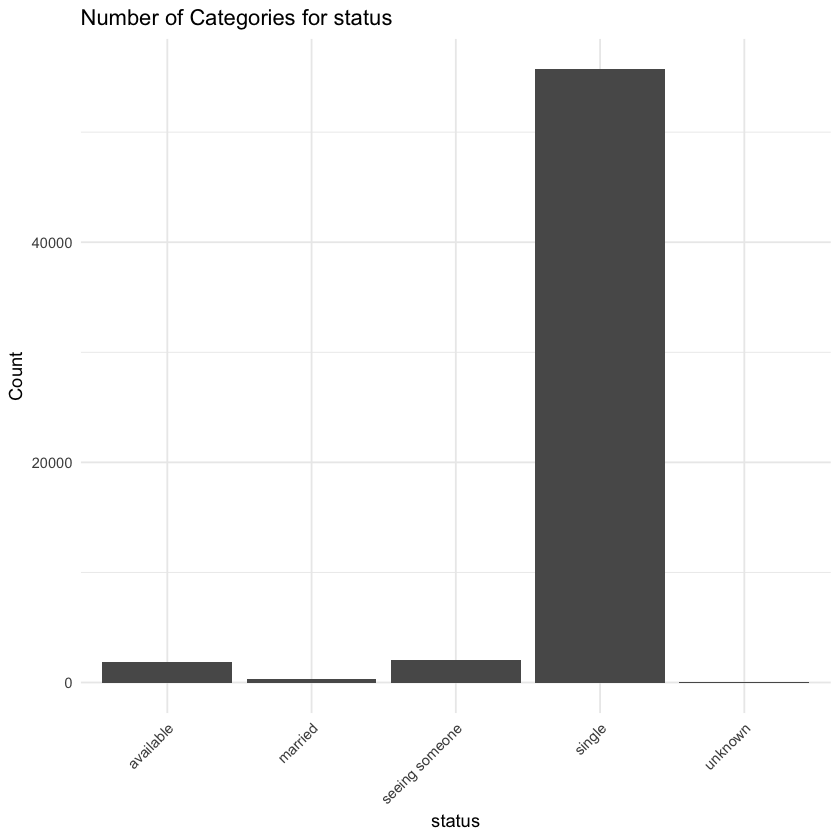

In [166]:
# 'status'
df_status <- create_df_with_counts(df_eda$status)
print_df_with_category_count(df_status, 'status')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   26.00   30.00   32.34   37.00  110.00 

Number of invalid age records:  2 
Percentage of invalid age records:  0.003336336 %


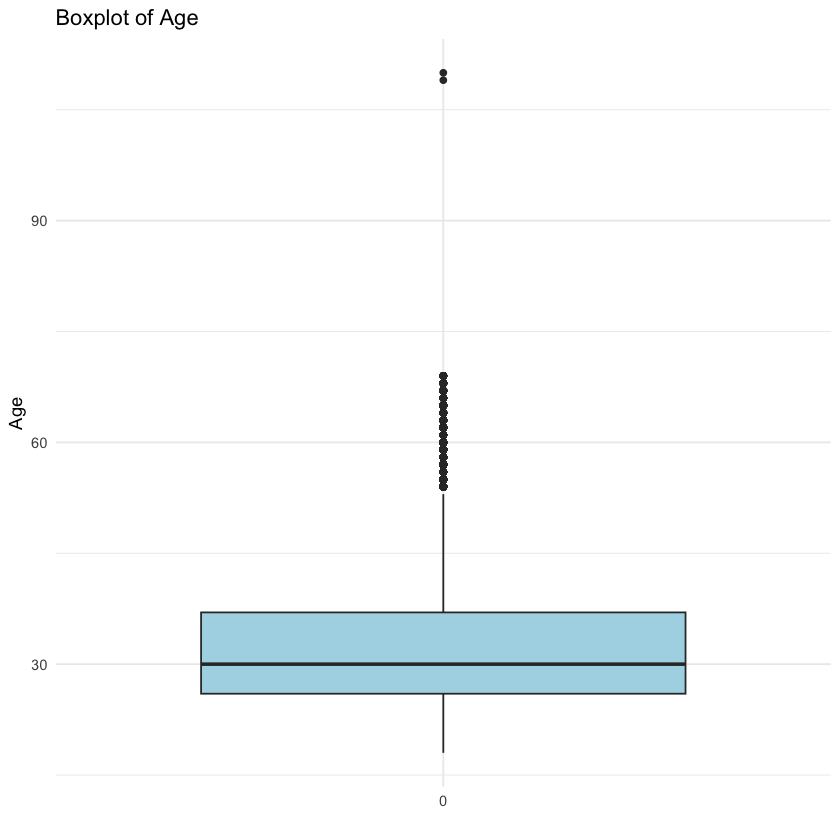

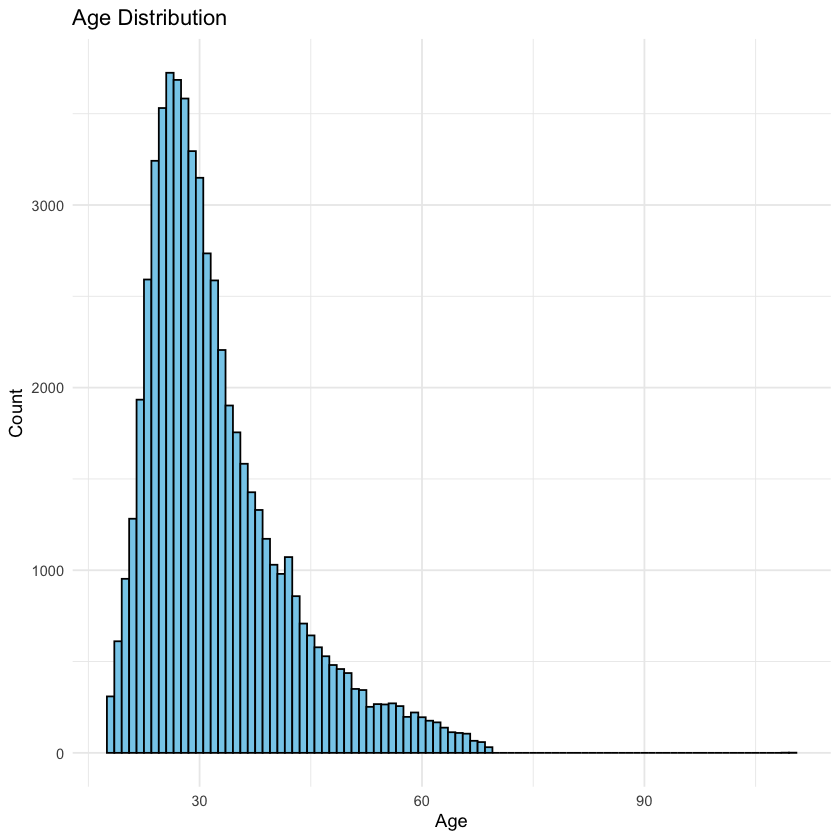

In [28]:
# Let's start with analyzing the 'age' column

# Summary of age column
summary(df_eda$age)

# Check how many records have unrealistic values (age < 18 or age > 100)
invalid_age <- df_eda %>%
  filter(age < 18 | age > 100)

# Calculate percentage of invalid age records
invalid_age_count <- nrow(invalid_age)
invalid_age_percentage <- (invalid_age_count / nrow(df_eda)) * 100

cat("Number of invalid age records: ", invalid_age_count, "\n")
cat("Percentage of invalid age records: ", invalid_age_percentage, "%\n")

# Visualize age data with a boxplot to identify outliers
ggplot(df_eda, aes(x = factor(0), y = age)) +
  geom_boxplot(fill = "lightblue") +
  theme_minimal() +
  labs(title = "Boxplot of Age", x = "", y = "Age")

# Plot age distribution with a histogram
ggplot(df_eda, aes(x = age)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  theme_minimal() +
  labs(title = "Age Distribution", x = "Age", y = "Count")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0    66.0    68.0    68.3    71.0    95.0       3 

Number of invalid height records:  27 
Percentage of invalid height records:  0.04504054 %


Warning message:
"Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_bin()`)."


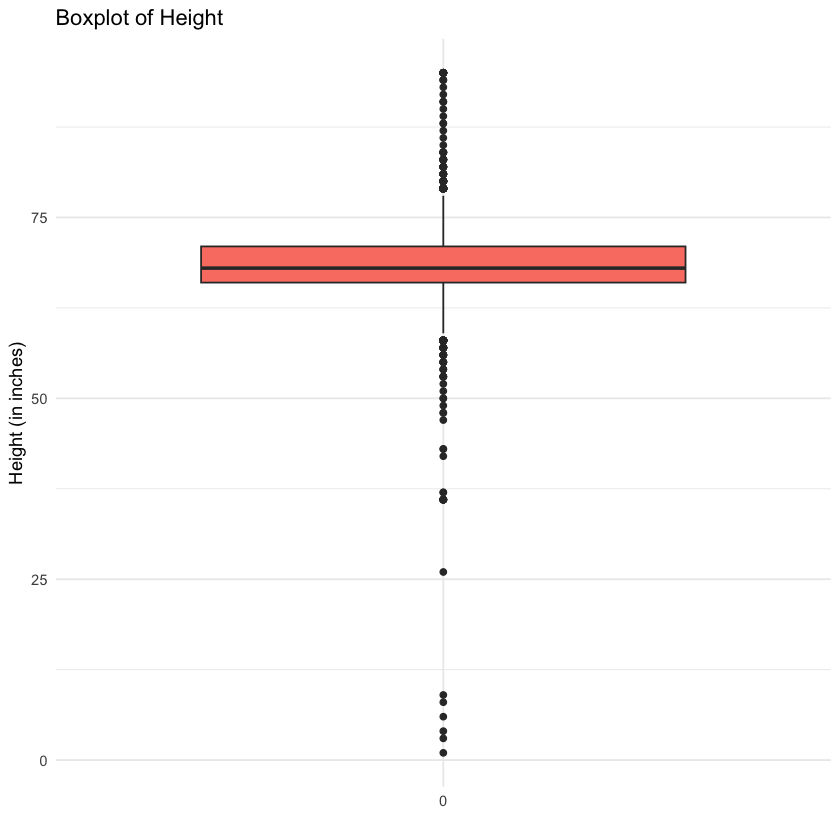

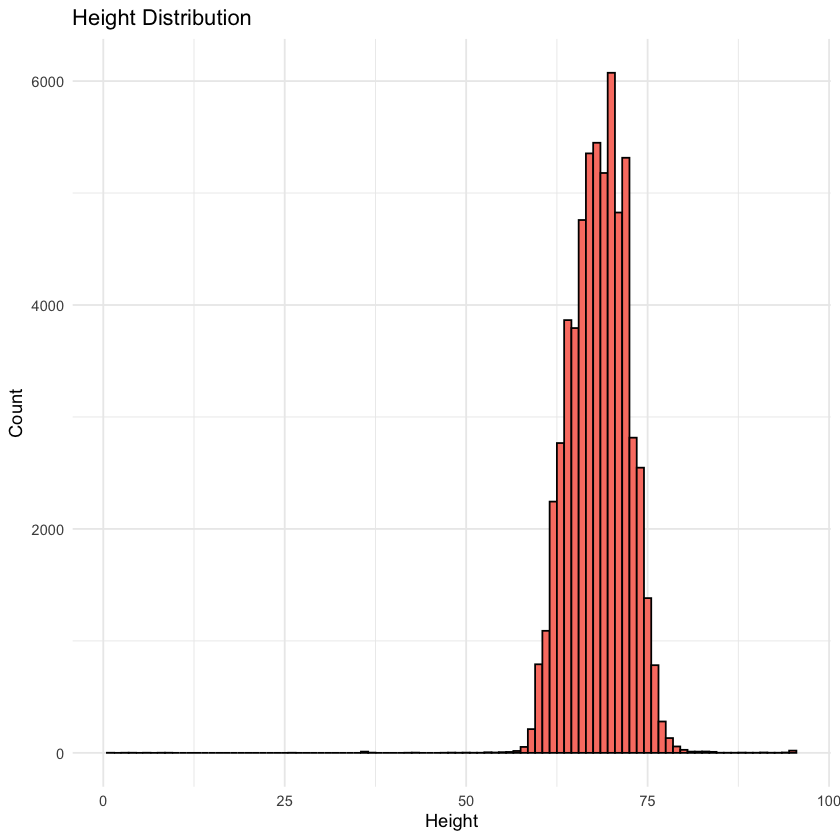

In [29]:
# Analysis of height column

# Summary of height column
summary(df_eda$height)

# Check for invalid height values (less than 50 inches or greater than 95 inches)
invalid_height <- df_eda %>%
  filter(height < 50 | height > 95)

# Calculate percentage of invalid height records
invalid_height_count <- nrow(invalid_height)
invalid_height_percentage <- (invalid_height_count / nrow(df_eda)) * 100

cat("Number of invalid height records: ", invalid_height_count, "\n")
cat("Percentage of invalid height records: ", invalid_height_percentage, "%\n")

# Visualize height data with a boxplot to detect outliers
ggplot(df_eda, aes(x = factor(0), y = height)) +
  geom_boxplot(fill = "salmon") +
  theme_minimal() +
  labs(title = "Boxplot of Height", x = "", y = "Height (in inches)")

# Plot height distribution with a histogram
ggplot(df_eda, aes(x = height)) +
  geom_histogram(binwidth = 1, fill = "salmon", color = "black") +
  theme_minimal() +
  labs(title = "Height Distribution", x = "Height", y = "Count")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  20000   20000   50000  104395  100000 1000000   48442 

Number of invalid income records:  0 
Percentage of invalid income records:  0 %


Warning message:
"Removed 48442 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 48442 rows containing non-finite outside the scale range
(`stat_bin()`)."


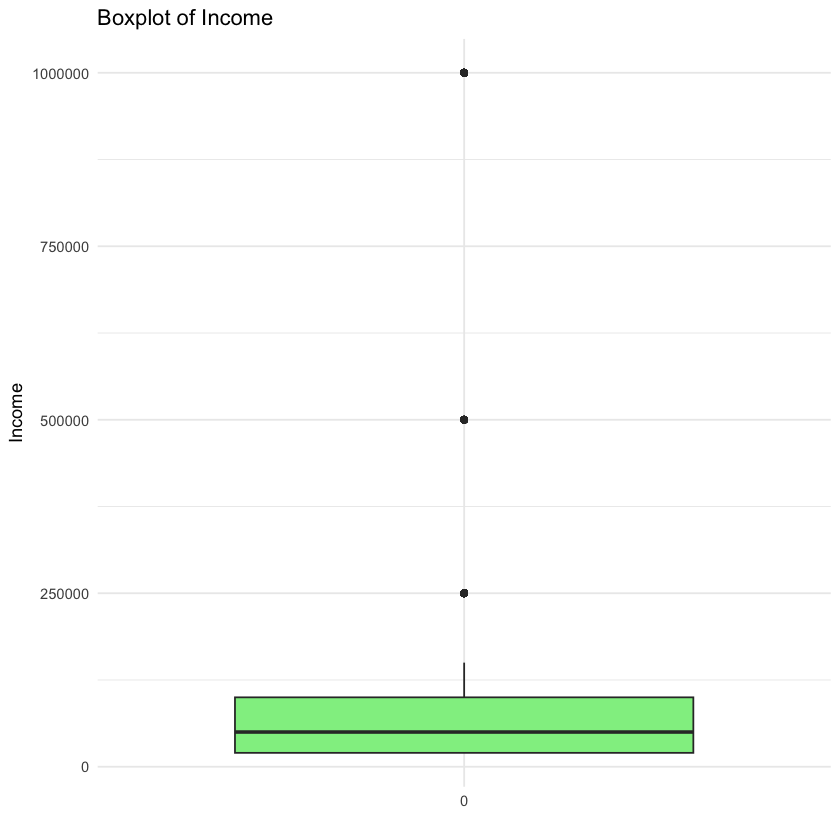

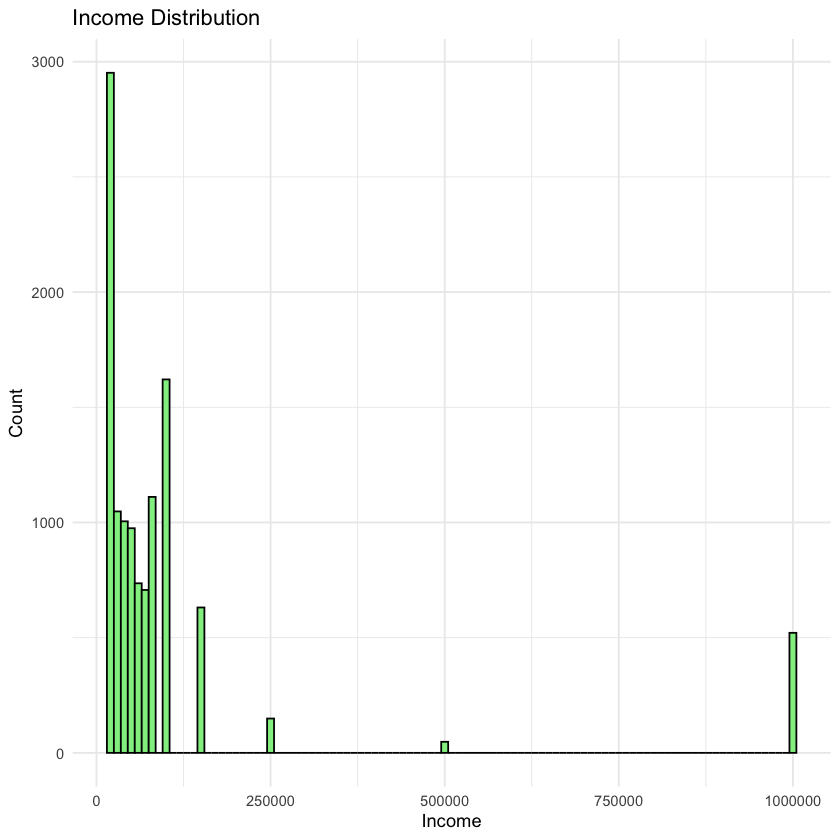

In [30]:
# Income analysis

# Summary of income column
summary(df_eda$income)

# Check for invalid income values (income > 1,000,000)
invalid_income <- df_eda %>%
  filter(income > 1000000)

# Calculate percentage of invalid income records
invalid_income_count <- nrow(invalid_income)
invalid_income_percentage <- (invalid_income_count / nrow(df_eda)) * 100

cat("Number of invalid income records: ", invalid_income_count, "\n")
cat("Percentage of invalid income records: ", invalid_income_percentage, "%\n")

# Visualize income with a boxplot
ggplot(df_eda, aes(x = factor(0), y = income)) +
  geom_boxplot(fill = "lightgreen") +
  theme_minimal() +
  labs(title = "Boxplot of Income", x = "", y = "Income")

# Plot income distribution
ggplot(df_eda, aes(x = income)) +
  geom_histogram(binwidth = 10000, fill = "lightgreen", color = "black") +
  theme_minimal() +
  labs(title = "Income Distribution", x = "Income", y = "Count")

In [31]:
# Now let's check how many records have complete data (i.e., no missing values in any column)
complete_records <- df_eda[complete.cases(df_eda), ]

# Calculate the percentage of records with complete data
complete_data_count <- nrow(complete_records)
complete_data_percentage <- (complete_data_count / nrow(df_eda)) * 100

cat("Number of complete records: ", complete_data_count, "\n")
cat("Percentage of complete records: ", complete_data_percentage, "%\n")

Number of complete records:  2077 
Percentage of complete records:  3.464785 %


Warning message:
"Removed 48442 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 48442 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


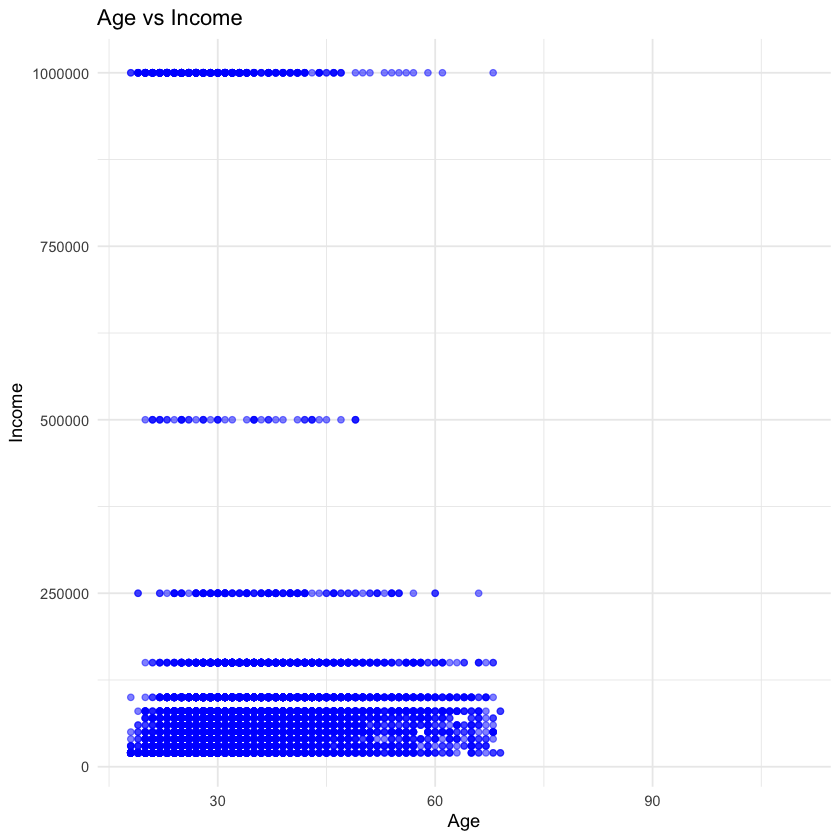

                     
                      desperately not at all often rarely socially very often
  anything                     21        295   574    510     4534         58
  halal                         0          4     1      0        4          0
  kosher                        0          1     0      2        7          1
  mostly anything              66        842  1386   1537    12277        129
  mostly halal                  3         10     2      8       16          4
  mostly kosher                 1          7     4     17       50          5
  mostly other                  8         91    49    176      646          5
  mostly vegan                  2         40    22     62      193          3
  mostly vegetarian            19        195   233    466     2388         20
  other                         1         35    23     60      192          1
  strictly anything            66        182   685    318     3677         59
  strictly halal                1         

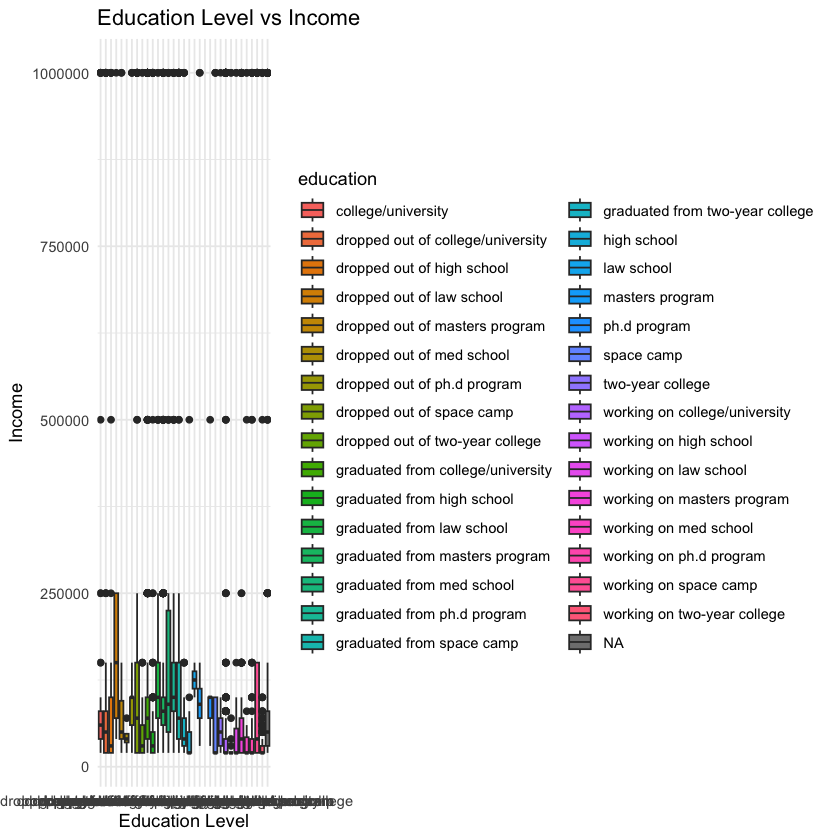

In [32]:
# Now, we perform some combined column analysis. Let's analyze 'age' vs 'income'
ggplot(df_eda, aes(x = age, y = income)) +
  geom_point(alpha = 0.5, color = "blue") +
  theme_minimal() +
  labs(title = "Age vs Income", x = "Age", y = "Income")

# Also analyze the relationship between 'education' and 'income'
ggplot(df_eda, aes(x = education, y = income, fill = education)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Education Level vs Income", x = "Education Level", y = "Income")

# Now analyze 'diet' vs 'drinks' to see the distribution between these two habits
diet_drinks_table <- table(df_eda$diet, df_eda$drinks)
print(diet_drinks_table)

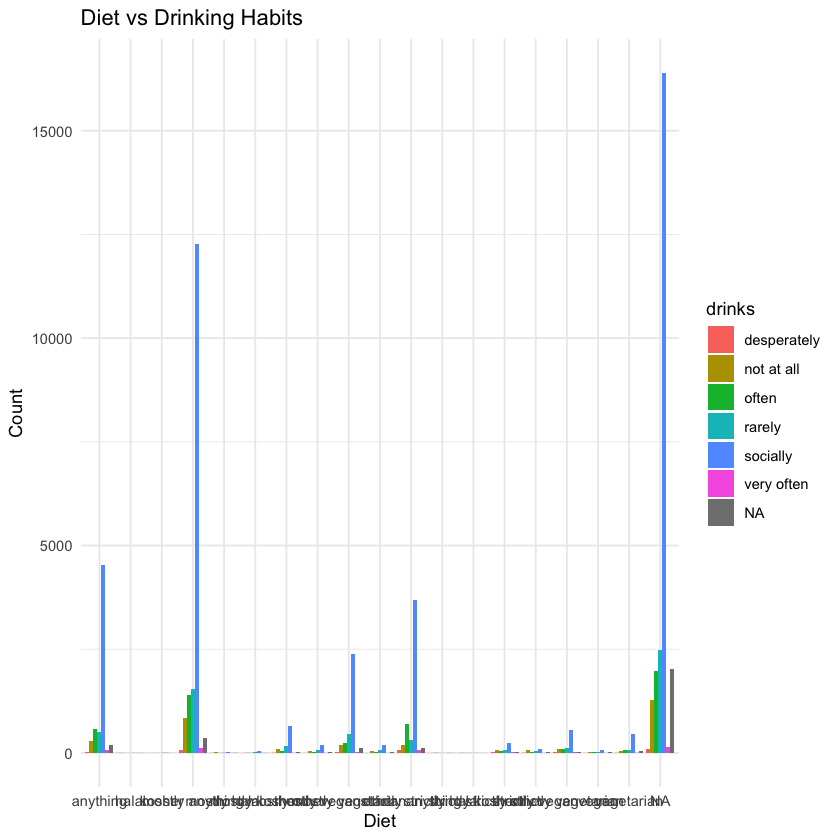

In [33]:
# Plot diet vs drinks
ggplot(df_eda, aes(x = diet, fill = drinks)) +
  geom_bar(position = "dodge") +
  theme_minimal() +
  labs(title = "Diet vs Drinking Habits", x = "Diet", y = "Count")

In [39]:
# Map visualization: Display users on a map based on location
leaflet(df_eda) %>%
  addTiles() %>%
  addCircleMarkers(~lon, ~lat, radius = 2, color = "blue",
                   fillOpacity = 0.5, popup = ~location) %>%
  addProviderTiles(providers$Stamen.TonerLite)

HTML widgets cannot be represented in plain text (need html)

Warning message:
"Removed 48442 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


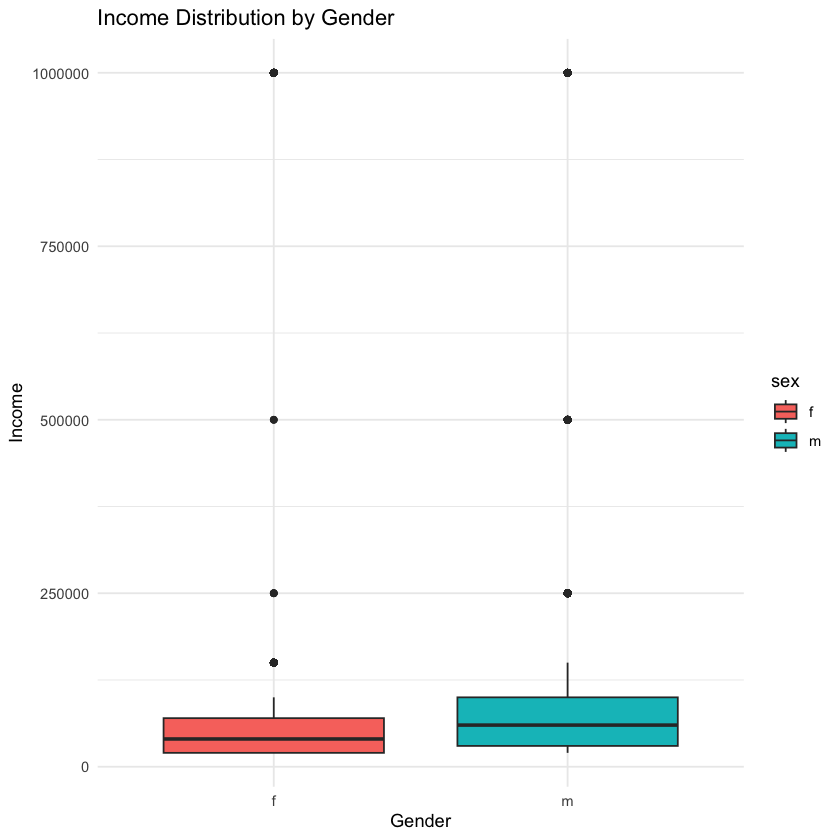

In [40]:
# Analyzing 'sex' and 'income' combination to check income distribution by gender
ggplot(df_eda, aes(x = sex, y = income, fill = sex)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Income Distribution by Gender", x = "Gender", y = "Income")

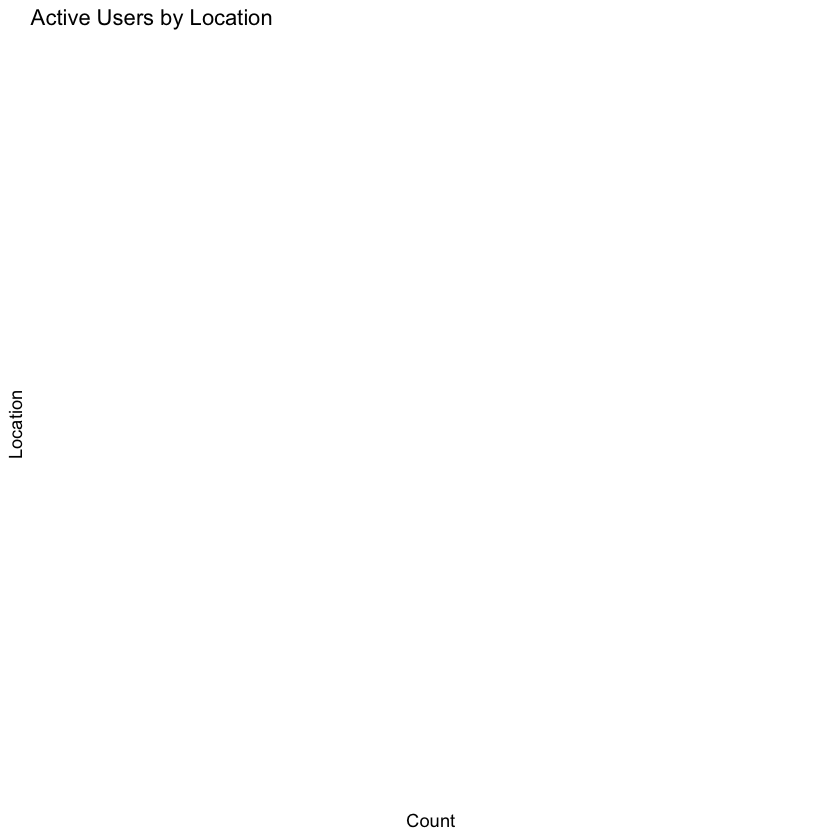

In [41]:
# Analyzing 'last_online' column: Check activity in the last year
df_eda$last_online <- as.Date(df_eda$last_online, format = "%Y-%m-%d")

# Filter active users (who were online in the last year)
active_users <- df_eda %>%
  filter(last_online > Sys.Date() - years(1))

  # Plot number of active users by location
ggplot(active_users, aes(x = location)) +
  geom_bar(fill = "orange") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Active Users by Location", x = "Location", y = "Count")

# Exporting cleaned and merged data for future use
write.csv(df_eda_latlon, "df_eda_latlon_cleaned.csv", row.names = FALSE)

In [46]:
# Generate summary report using DataExplorer
# create_report(profiles_latlon)

# End of R code

##################


bisexual      gay straight 
    2767     5573    51606 

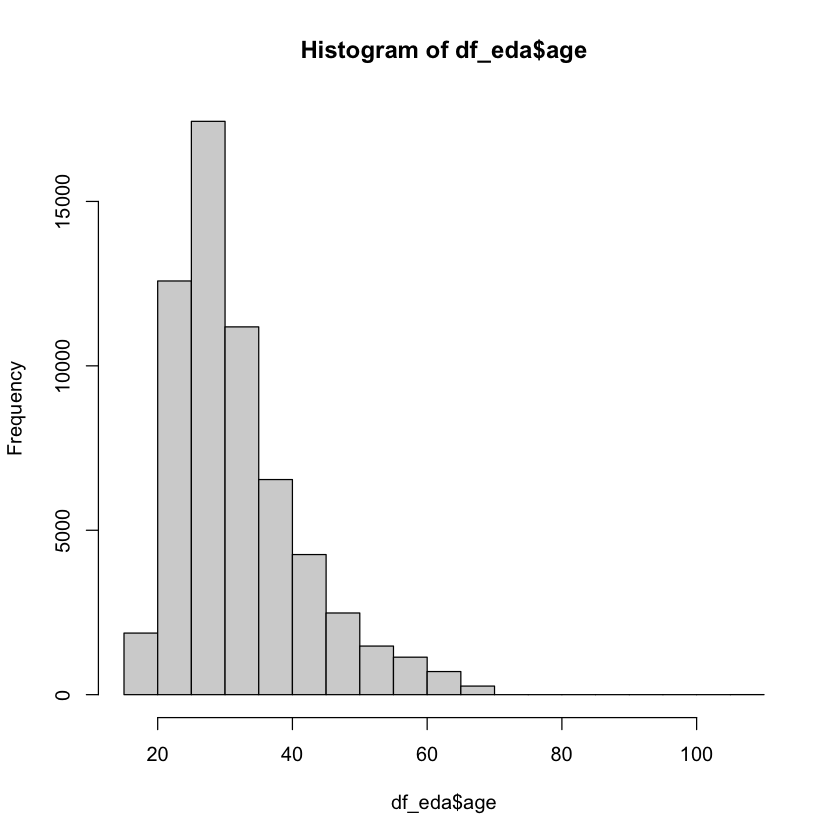

In [42]:
##### I would do some basic EDA and plotting of individual vars then move to more complex interactions 
table(df_eda$orientation)
hist(df_eda$age)

In [43]:
##### Example 2 way EDA
table(df_eda$age, df_eda$orientation)

     
      bisexual  gay straight
  18        49   28      232
  19        72   66      473
  20       109  107      737
  21       132  149     1001
  22       160  212     1562
  23       190  254     2148
  24       177  304     2761
  25       183  325     3023
  26       175  352     3197
  27       163  303     3219
  28       145  353     3085
  29       135  271     2889
  30       113  300     2736
  31        90  248     2397
  32       127  199     2261
  33        75  177     1954
  34        64  163     1675
  35        79  135     1541
  36        59  131     1393
  37        65  142     1220
  38        55  103     1172
  39        45   87     1040
  40        27   95      908
  41        21  105      854
  42        42  100      930
  43        27   92      739
  44        26   87      595
  45        18   70      555
  46        17   73      488
  47        21   79      429
  48        13   53      415
  49        14   60      385
  50        14   56      367
  51    

In [44]:
#### Missing in income & quick mean imputation example; you can still use vtreat instead to clean all
#### this data but we are only exploring not modeling so maybe dont do it for this case. # nolint: line_length_linter.
sum(is.na(df_eda$income))
df_eda$income[is.na(df_eda$income)] <- mean(df_eda$income, na.rm = TRUE)

##### Feature Engineer relationship status & education if you thought there was a connection # nolint: line_length_linter.
df_eda$statEDU <- paste(df_eda$status, df_eda$education, sep = "_")
table(df_eda$statEDU)

[1] 48442


                                    available_NA 
                                             202 
                    available_college/university 
                                              24 
     available_dropped out of college/university 
                                              96 
            available_dropped out of high school 
                                               9 
             available_dropped out of law school 
                                               3 
        available_dropped out of masters program 
                                              16 
             available_dropped out of med school 
                                               1 
           available_dropped out of ph.d program 
                                              13 
             available_dropped out of space camp 
                                              28 
       available_dropped out of two-year college 
                                              16 

In [45]:
##### Enrich with one of the new data sets, you may want to do this with the other csv # nolint: line_length_linter.
moreData <- left_join(df_eda, latlon, by = "location") # nolint: object_name_linter, line_length_linter.
head(moreData)

age body_type      diet              drinks   drugs    
1 22  a little extra strictly anything socially never    
2 35  average        mostly other      often    sometimes
3 38  thin           anything          socially NA       
4 23  thin           vegetarian        socially NA       
5 29  athletic       NA                socially never    
6 29  average        mostly anything   socially NA       
  education                         ethnicity           height income
1 working on college/university     asian, white        75     104395
2 working on space camp             white               70      80000
3 graduated from masters program    NA                  68     104395
4 working on college/university     white               71      20000
5 graduated from college/university asian, black, other 66     104395
6 graduated from college/university white               67     104395
  job                            ... smokes   
1 transportation                 ... sometimes
2 hospitality / travel           ... no       
3 NA                             ... no       
4 student                        ... no       
5 artistic / musical / writer    ... no       
6 computer / hardware / software ... no       
  speaks                                             status   
1 english                                            single   
2 english(fluently), spanish(poorly), french(poorly) single   
3 english, french, c++                               available
4 english, german(poorly)                            single   
5 english                                            single   
6 english(fluently), chinese(okay)                   single   
  essay0                                                                                                                                      
1 about me:    i would love to think that i was some some kind of intellectual: either the dumbest smart guy, or the smartest dumb guy. can't 
2 i am a chef: this is what that means.  1. i am a workaholic.  2. i love to cook regardless of whether i am at work.  3. i love to drink and 
3 i'm not ashamed of much, but writing public text on an online dating site makes me pleasantly uncomfortable. i'll try to be as earnest as po
4 i work in a library and go to school. . .                                                                                                   
5 hey how's it going? currently vague on the profile i know, more to come soon. looking to meet new folks outside of my circle of friends. i'm
6 i'm an australian living in san francisco, but don't hold that against me. i spend most of my days trying to build cool stuff for my company
  lat.x    lon.x     language_count statEDU                                 
1 37.65607 -122.4142 1              single_working on college/university    
2 37.80508 -122.2731 3              single_working on space camp            
3 37.77712 -122.4196 3              available_graduated from masters program
4 37.86988 -122.2705 2              single_working on college/university    
5 37.77712 -122.4196 1              single_graduated from college/university
6 37.77712 -122.4196 2              single_graduated from college/university
  lat.y    lon.y    
1 37.65607 -122.4142
2 37.80508 -122.2731
3 37.77712 -122.4196
4 37.86988 -122.2705
5 37.77712 -122.4196
6 37.77712 -122.4196

In [46]:
#### You can use complete.cases() to identify records without NA if that is the route
#### you want to explore.  Of course you can use a function covered in class to visualize
#### the variables with the hightest % of NA so you could drop those instead of all rows
#### with an NA. # nolint: line_length_linter.
completeMoreData <- moreData[complete.cases(moreData), ] # nolint: object_name_linter, line_length_linter.
completeMoreData
nrow(completeMoreData)
dim(completeMoreData)

age body_type      diet                drinks     drugs    
1     22  a little extra strictly anything   socially   never    
2     35  average        mostly other        often      sometimes
20    33  athletic       mostly anything     socially   never    
23    30  fit            mostly anything     socially   never    
37    32  athletic       mostly anything     socially   never    
45    29  curvy          anything            socially   sometimes
73    35  athletic       mostly anything     socially   sometimes
95    29  fit            mostly anything     socially   sometimes
99    31  curvy          anything            socially   sometimes
106   42  fit            mostly anything     socially   never    
107   45  fit            mostly anything     socially   never    
114   23  curvy          mostly anything     rarely     never    
122   50  fit            mostly anything     socially   never    
124   21  thin           strictly anything   socially   often    
138   50  average        mostly anything     often      never    
142   59  fit            anything            socially   never    
168   26  curvy          mostly anything     socially   never    
169   26  fit            mostly anything     socially   never    
177   27  athletic       mostly anything     socially   never    
178   29  a little extra mostly halal        often      never    
182   21  fit            mostly anything     socially   never    
183   27  curvy          anything            often      never    
190   37  fit            mostly anything     not at all never    
197   28  athletic       mostly anything     socially   sometimes
202   28  fit            mostly anything     socially   never    
204   31  fit            strictly anything   socially   never    
212   33  average        mostly anything     rarely     never    
218   43  thin           strictly anything   socially   never    
224   42  athletic       anything            socially   never    
232   50  thin           mostly anything     socially   never    
...   ... ...            ...                 ...        ...      
59640 23  athletic       vegan               socially   never    
59641 26  overweight     anything            socially   never    
59643 24  average        mostly vegan        socially   often    
59647 38  a little extra mostly anything     socially   never    
59664 29  thin           mostly vegetarian   socially   never    
59675 27  average        strictly anything   socially   never    
59686 32  full figured   mostly anything     rarely     never    
59696 22  curvy          mostly anything     often      never    
59707 25  average        strictly vegetarian socially   never    
59720 34  athletic       strictly anything   often      never    
59734 22  skinny         mostly vegetarian   socially   never    
59738 23  curvy          mostly anything     socially   sometimes
59741 61  athletic       anything            often      never    
59748 25  thin           anything            often      sometimes
59751 23  fit            strictly anything   socially   never    
59753 33  athletic       mostly anything     socially   never    
59795 55  a little extra anything            socially   never    
59818 48  thin           strictly anything   socially   sometimes
59825 26  thin           mostly anything     socially   never    
59834 24  a little extra anything            often      never    
59839 33  fit            mostly anything     socially   sometimes
59853 28  curvy          anything            socially   never    
59877 33  average        strictly other      often      never    
59897 26  curvy          mostly vegetarian   often      sometimes
59903 26  curvy          mostly other        rarely     never    
59905 33  a little extra mostly other        not at all never    
59908 24  skinny         anything            socially   sometimes
59914 29  full figured   mostly anything     socially   never    
59943 24  fit            mostly anything     o

[1] 6627

[1] 6627   28

In [54]:
# End


# Artifacts
# 1. R code
# 2. Word document
# 3. PowerPoint presentation
# 4. Presenter's notes
# 5. YouTube video script
